# Statistical Arbitrage - Pairs Trading

In [3]:
# Import Dependencies
from cointegration_analysis import estimate_long_run_short_run_relationships, engle_granger_two_step_cointegration_test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This code imports the necessary libraries and modules to perform a cointegration analysis on a dataset in Python. Specifically, it imports the estimate_long_run_short_run_relationships and engle_granger_two_step_cointegration_test functions from the cointegration_analysis module, as well as the pandas, numpy, and matplotlib libraries for data manipulation and visualization. The "%matplotlib inline" command allows for inline plotting in Jupyter notebooks.

# Data Analysis

This section visualizes our data and helps to understand, do the cointegration_analysis and display the results as well as make a selection of pairs that are cointegrated to further explore in the Algorithm section/

In [4]:
def read_data(filename):
    '''
    This function reads the .csv stored at the 'filename' location and returns a DataFrame
    with two levels of column names. The first level column contains the Stock Name and the 
    second contains the type of market data, e.g. bid/ask, price/volume.
    '''
    df = pd.read_csv(filename, index_col=0)
    df.columns = [df.columns.str[-2:], df.columns.str[:-3]]

    return df

market_data = read_data('Pairs Trading.csv')

# Show the First 5 Rows
display(market_data.head())

# Show the Stocks
stock_names = list(market_data.columns.get_level_values(0).unique())
print('The stocks available are',stock_names)

AA                                    BB            \
                 BidPrice BidVolume AskPrice AskVolume BidPrice BidVolume   
01/01/2018 00:05    80.00       135    80.25       135   100.55       105   
01/01/2018 00:10    79.95       124    80.20       145   100.50       104   
01/01/2018 00:15    79.95       124    80.15       155   100.65       100   
01/01/2018 00:20    79.95       130    80.10       154   100.75       112   
01/01/2018 00:25    79.90       121    80.10       138   100.60       126   

                                          CC            ...       MM  \
                 AskPrice AskVolume BidPrice BidVolume  ... AskPrice   
01/01/2018 00:05   100.85       105    97.85       112  ...    95.20   
01/01/2018 00:10   100.80       113    97.80       109  ...    95.20   
01/01/2018 00:15   100.95       107    97.85       110  ...    95.25   
01/01/2018 00:20   101.05       109    97.95       100  ...    95.25   
01/01/2018 00:25   100.85       124    97.95        98  ...    95.20   

                                 NN                                    OO  \
                 AskVolume BidPrice BidVolume AskPrice AskVolume BidPrice   
01/01/2018 00:05       140   137.20       122   137.60       122    88.80   
01/01/2018 00:10       144   137.20       111   137.55       110    88.75   
01/01/2018 00:15       156   137.25       117   137.65       106    88.70   
01/01/2018 00:20       153   137.25       107   137.65        97    88.75   
01/01/2018 00:25       153   137.15       111   137.60       109    88.75   

                                               
                 BidVolume AskPrice AskVolume  
01/01/2018 00:05       109    89.05       109  
01/01/2018 00:10       115    89.00       100  
01/01/2018 00:15        92    89.00       100  
01/01/2018 00:20       100    89.00       113  
01/01/2018 00:25        98    89.00       112  

[5 rows x 60 columns]

The stocks available are ['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'JJ', 'KK', 'LL', 'MM', 'NN', 'OO']


This python code essentially reads a .csv file and converts it into a DataFrame with two levels of column names. The first level contains the stock names and the second level contains the type of market data, such as bid/ask or price/volume. The function "read_data" is responsible for reading the .csv file and converting it into a DataFrame. The "market_data" variable is created to store the DataFrame created by the "read_data" function. The "display" function is used to show the first 5 rows of the DataFrame. The "stock_names" variable is created to store a list of the stock names present in the DataFrame. Finally, the print statement displays the available stocks by accessing the first level of column names in the DataFrame and getting their unique values.

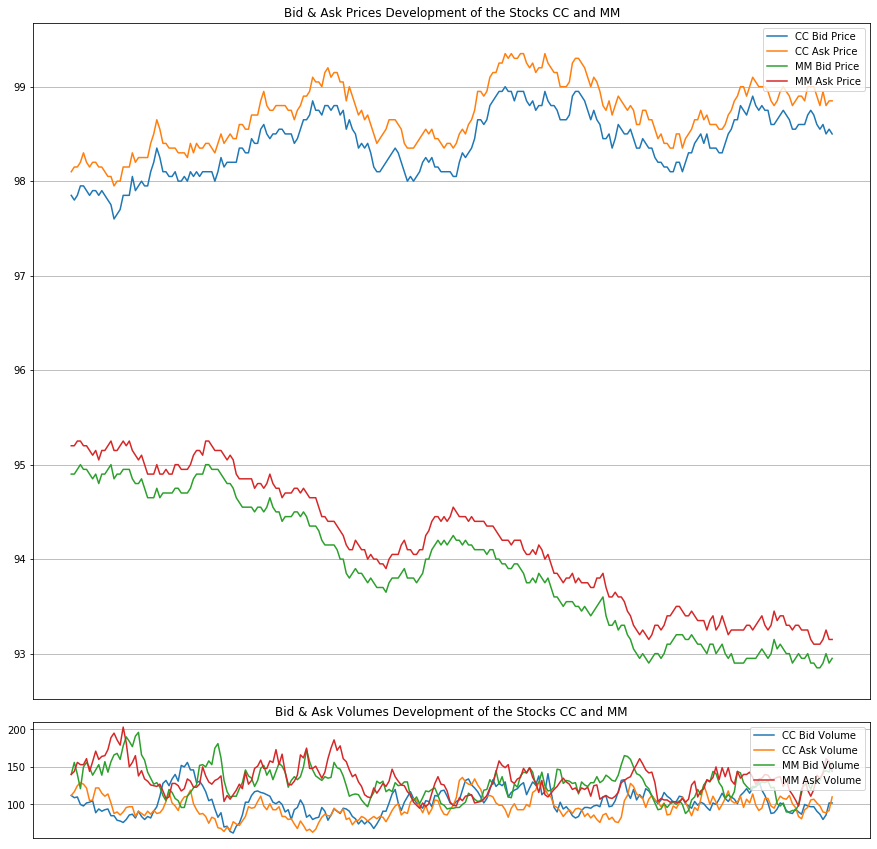

In [5]:
# Specify variable used for Plotting
market_data_segmented = market_data[:250]

# Defining Plots
def bid_ask_price_plot(stock1, stock2):
    '''
    This function creates a subplot with a specified gridsize to be able to
    effectively match it with a different subplot while still maintaining
    it's independency of being able to just show this plot.
    '''
    ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
    plt.title('Bid & Ask Prices Development of the Stocks ' + stock1 + " and " + stock2)
    plt.grid()

    ax1.plot(market_data_segmented.index,
             market_data_segmented[stock1, 'BidPrice'])
    ax1.plot(market_data_segmented.index,
             market_data_segmented[stock1, 'AskPrice'])
    
    ax1.plot(market_data_segmented.index,
             market_data_segmented[stock2, 'BidPrice'])
    ax1.plot(market_data_segmented.index,
             market_data_segmented[stock2, 'AskPrice'])

    # We don't want to see all the timestamps
    ax1.axes.get_xaxis().set_visible(False)

    ax1.legend([stock1 + " Bid Price", stock1 + " Ask Price", stock2 + " Bid Price", stock2 + " Ask Price"], loc='upper right')

def bid_ask_volume_plot(stock1, stock2):
    '''
    This function is very similar to above's function with the exception
    of creating a smaller subplot and using different data. This function
    is meant for displaying volumes. 
    '''
    ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1)
    plt.title('Bid & Ask Volumes Development of the Stocks ' + stock1 + " and " + stock2)
    plt.grid()

    ax2.plot(market_data_segmented.index,
             market_data_segmented[stock1, 'BidVolume'])
    ax2.plot(market_data_segmented.index,
             market_data_segmented[stock1, 'AskVolume'])

    ax2.plot(market_data_segmented.index,
             market_data_segmented[stock2, 'BidVolume'])
    ax2.plot(market_data_segmented.index,
             market_data_segmented[stock2, 'AskVolume'])

    # We don't want to see all the timestamps
    ax2.axes.get_xaxis().set_visible(False)

    ax2.legend([stock1 + " Bid Volume", stock1 + " Ask Volume", stock2 + " Bid Volume", stock2 + " Ask Volume"], loc='upper right')

# Show Plot
plt.figure(figsize=(15, 15))
plt.show(bid_ask_price_plot("CC", "MM"), bid_ask_volume_plot("CC", "MM"))

This code creates two functions, "bid_ask_price_plot" and "bid_ask_volume_plot," which plot bid and ask prices and volumes for two specified stocks. The first function creates a larger plot with a title and four lines representing the bid and ask prices for the two stocks. The second function creates a smaller plot with a title and four lines representing the bid and ask volumes for the two stocks. Both functions use a specified grid size to ensure that the plots can be matched with other plots. The "plt.show" function then displays both plots together, with the two functions being passed as arguments.

In [6]:
# Calculate mid-prices of each stock and add them to the DataFrame
for stock in stock_names:
    market_data[stock,'MidPrice'] = (market_data[stock,'BidPrice'] + market_data[stock,'AskPrice']) / 2
    market_data = market_data.sort_index(axis=1)
    
market_data.head()

AA                                             BB  \
                 AskPrice AskVolume BidPrice BidVolume MidPrice AskPrice   
01/01/2018 00:05    80.25       135    80.00       135   80.125   100.85   
01/01/2018 00:10    80.20       145    79.95       124   80.075   100.80   
01/01/2018 00:15    80.15       155    79.95       124   80.050   100.95   
01/01/2018 00:20    80.10       154    79.95       130   80.025   101.05   
01/01/2018 00:25    80.10       138    79.90       121   80.000   100.85   

                                                        ...       NN  \
                 AskVolume BidPrice BidVolume MidPrice  ... AskPrice   
01/01/2018 00:05       105   100.55       105  100.700  ...   137.60   
01/01/2018 00:10       113   100.50       104  100.650  ...   137.55   
01/01/2018 00:15       107   100.65       100  100.800  ...   137.65   
01/01/2018 00:20       109   100.75       112  100.900  ...   137.65   
01/01/2018 00:25       124   100.60       126  100.725  ...   137.60   

                                                             OO            \
                 AskVolume BidPrice BidVolume MidPrice AskPrice AskVolume   
01/01/2018 00:05       122   137.20       122  137.400    89.05       109   
01/01/2018 00:10       110   137.20       111  137.375    89.00       100   
01/01/2018 00:15       106   137.25       117  137.450    89.00       100   
01/01/2018 00:20        97   137.25       107  137.450    89.00       113   
01/01/2018 00:25       109   137.15       111  137.375    89.00       112   

                                              
                 BidPrice BidVolume MidPrice  
01/01/2018 00:05    88.80       109   88.925  
01/01/2018 00:10    88.75       115   88.875  
01/01/2018 00:15    88.70        92   88.850  
01/01/2018 00:20    88.75       100   88.875  
01/01/2018 00:25    88.75        98   88.875  

[5 rows x 75 columns]

This code first imports the "onepagecode.substack.com" module and then uses it to iterate through a list of stock names in the variable stock_names. For each stock, the code calculates the mid-price by adding the bid price and ask price and dividing the sum by two. These mid-prices are then stored in a separate column called "MidPrice" in the market_data dataframe. Finally, the market_data dataframe is sorted by column index and the first few rows are displayed using the ".head()" function. Essentially, this code calculates the mid-prices for a list of stocks and displays them in a sorted dataframe.

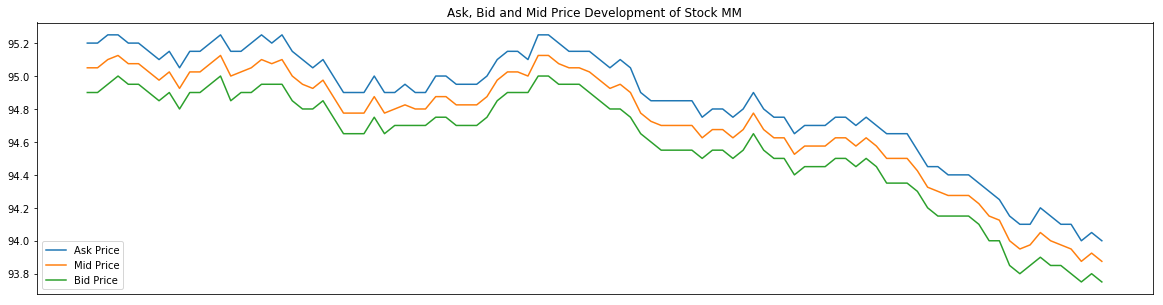

In [7]:
def mid_price_check(stock):
    '''
    Function that checks for different stocks if the MidPrice
    is correctly specified.
    '''
    plt.figure(figsize=(20, 5))
    plt.plot(market_data[stock,'AskPrice'][:100])
    plt.plot(market_data[stock,'MidPrice'][:100])
    plt.plot(market_data[stock,'BidPrice'][:100])

    plt.xticks([]) # Timestamp is not Important
    plt.title('Ask, Bid and Mid Price Development of Stock ' + stock)
    plt.legend(["Ask Price", "Mid Price", "Bid Price"], loc='lower left')
    plt.show()
    
mid_price_check('MM')

The code is a function called "mid_price_check" that checks the mid price for different stocks and plots it on a graph. It takes in a parameter called "stock" which refers to the stock that is being checked.   The function creates a figure with a size of 20x5 using the plt.figure() function. It then plots the market data for the specified stock's ask price, mid price, and bid price using the plt.plot() function. The x-axis is set to display no ticks using the plt.xticks([]) function. A title is added to the figure using the plt.title() function and a legend is created using the plt.legend() function to label the different lines in the graph. Finally, the graph is displayed using the plt.show() function. Overall, the function helps visualize the mid price for a particular stock and compare it to the ask and bid prices.

In [8]:
# Obtain the statistical parameters for each and every pair
data_analysis = {'Pairs': [],
                 'Constant': [],
                 'Gamma': [],
                 'Alpha': [],
                 'P-Value': []}

data_zvalues = {}

for stock1 in stock_names:
    for stock2 in stock_names:
        if stock1 != stock2:
            if (stock2, stock1) in data_analysis['Pairs']:
                continue

            pairs = stock1, stock2
            constant = estimate_long_run_short_run_relationships(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[0]
            gamma = estimate_long_run_short_run_relationships(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[1]
            alpha = estimate_long_run_short_run_relationships(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[2]
            pvalue = engle_granger_two_step_cointegration_test(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[1]
            zvalue = estimate_long_run_short_run_relationships(np.log(
                market_data[stock1, 'MidPrice']), np.log(market_data[stock2, 'MidPrice']))[3]

            data_analysis['Pairs'].append(pairs)
            data_analysis['Constant'].append(constant)
            data_analysis['Gamma'].append(gamma)
            data_analysis['Alpha'].append(alpha)
            data_analysis['P-Value'].append(pvalue)

            data_zvalues[pairs] = zvalue
            
data_analysis = round(pd.DataFrame(data_analysis),4).set_index('Pairs')

C:\Users\jerbo\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


This code is analyzing a dataset of market data for multiple stock names. The first line defines two variables as empty lists to be used for storing data. The next line defines a dictionary for storing z-values, which will be calculated later. The for loop is used to iterate through each stock name in the stock_names list. This is done twice, indicating that the code is looking for relationships between different pairs of stocks. The first if statement is checking if the two stocks being compared are the same. If they are, the code continues to the next iteration. If they are not the same, the code checks if the pair is already listed in the 'Pairs' list. If it is, the code also continues to the next iteration.   The next few lines use the estimate_long_run_short_run_relationships function to calculate the constant, gamma, and alpha values for the two stock names being compared. These values represent the long-run and short-run relationships between the two stocks. The next line uses the engle_granger_two_step_cointegration_test function which tests for cointegration between the two stock prices. The p-value is then calculated from this test. The z-value is also calculated using the same function used earlier to calculate the constant, gamma, and alpha values.   The last few lines then append the pairs, constant, gamma, alpha, and p-value to the data_analysis dictionary. The z-value is also added to the data_zvalues dictionary with the pairs as the key. Finally, the data_analysis dictionary is converted into a dataframe and rounded to four decimal places before being set as the index.   In summary, this code is looking for relationships and cointegration between different pairs of stock prices using specific functions and storing the results in a dictionary and a dataframe.

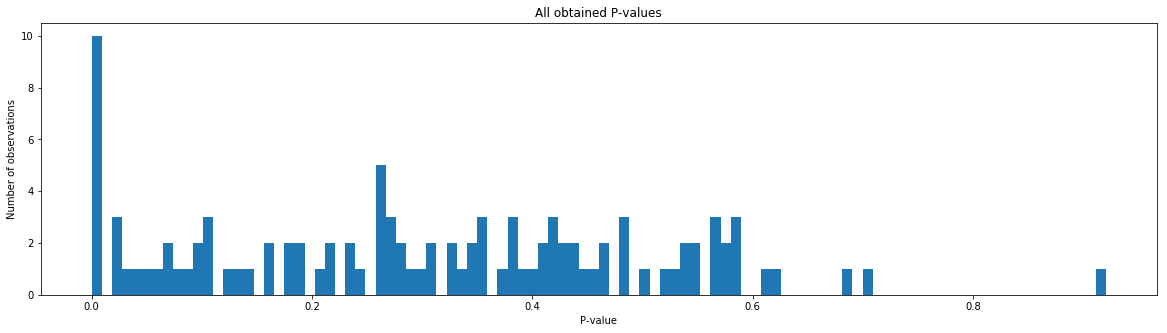

In [9]:
# Visualize the P-values
def plot_pvalues():
    """
    This function plots all obtained P-values.
    """
    plt.figure(figsize=(20, 5))
    plt.hist(data_analysis['P-Value'], bins=100)
    plt.xlabel('P-value')
    plt.ylabel('Number of observations')
    plt.title('All obtained P-values')
    plt.show()

plot_pvalues()

This code is a function that takes in a set of data called "data_analysis", and plots the distribution of the P-values in that data. The figure it creates is 20 units wide and 5 units tall. Then, it creates a histogram with 100 bins to represent the distribution of P-values. The x-axis of the histogram represents the P-values, and the y-axis represents the number of observations. Finally, the function gives the histogram a title and displays it. Another function called "plot_pvalues" is then called to execute this code.

In [10]:
# Show Top 10 and Bottom 10
display(data_analysis.sort_values('P-Value')[:10])
display(data_analysis.sort_values('P-Value')[-10:])

Constant   Gamma   Alpha  P-Value
Pairs                                      
(FF, NN)   -2.6104  1.4881 -0.0022   0.0000
(FF, MM)    0.3061  0.9676 -0.0338   0.0000
(BB, DD)   -2.4182  1.4758 -0.0075   0.0000
(DD, HH)   -1.6797  1.2787 -0.0040   0.0000
(BB, JJ)   -2.4809  1.6206 -0.0000   0.0000
(DD, JJ)    0.2277  1.0356  0.0002   0.0000
(MM, NN)   -2.9034  1.5153 -0.0002   0.0000
(BB, HH)   -4.8181  1.8712 -0.0024   0.0009
(HH, JJ)    1.9492  0.7041 -0.0002   0.0010
(AA, II)    0.0445  0.9944 -0.0002   0.0031

Constant   Gamma   Alpha  P-Value
Pairs                                      
(AA, BB)    4.2082  0.0571 -0.0001   0.5739
(EE, JJ)    5.0700 -0.0369 -0.0002   0.5765
(AA, MM)   10.2964 -1.2938 -0.0001   0.5812
(AA, KK)    9.7238 -1.1233 -0.0001   0.5826
(AA, JJ)    4.1324  0.0773 -0.0001   0.5860
(AA, DD)    4.2125  0.0540 -0.0001   0.6103
(CC, EE)    1.7955  0.5551 -0.0002   0.6199
(CC, OO)    8.4182 -0.8627 -0.0002   0.6888
(CC, GG)    2.8739  0.3184 -0.0002   0.7055
(AA, CC)    6.4143 -0.4308 -0.0001   0.9207

This code iterates through a dataset and sorts it based on the 'P-Value' column. The first line sorts the dataset in ascending order and returns the first 10 rows, while the second line sorts the dataset in descending order and returns the last 10 rows. This allows us to view the 10 most and least significant data points in terms of their p-values. P-values are statistical measures that indicate the likelihood of a null hypothesis being true. A lower p-value indicates a higher significance and a higher p-value indicates a lower significance. By sorting the dataset by p-values, we can quickly identify the most important and least important data points in the dataset. This code is useful for data analysis and can help us understand which variables have the most significant impact on our data. The display function simply shows the sorted dataset in a readable format.

In [11]:
# Selecting tradable pairs where P-Value < 0.01 and create a seperate DataFrame containing these pairs
tradable_pairs_analysis = data_analysis[data_analysis['P-Value'] < 0.01].sort_values('P-Value')

tradable_pairs_analysis

Constant   Gamma   Alpha  P-Value
Pairs                                      
(BB, DD)   -2.4182  1.4758 -0.0075   0.0000
(BB, JJ)   -2.4809  1.6206 -0.0000   0.0000
(DD, HH)   -1.6797  1.2787 -0.0040   0.0000
(DD, JJ)    0.2277  1.0356  0.0002   0.0000
(FF, MM)    0.3061  0.9676 -0.0338   0.0000
(FF, NN)   -2.6104  1.4881 -0.0022   0.0000
(MM, NN)   -2.9034  1.5153 -0.0002   0.0000
(BB, HH)   -4.8181  1.8712 -0.0024   0.0009
(HH, JJ)    1.9492  0.7041 -0.0002   0.0010
(AA, II)    0.0445  0.9944 -0.0002   0.0031

This code performs a data analysis on a dataset called "data_analysis". It first filters out any rows where the "P-Value" column has a value greater than 0.01. Then, it sorts the remaining rows by the values in the "P-Value" column in ascending order. The resulting dataset is stored in a variable called "tradable_pairs_analysis" and is used for further analysis or visualization. Essentially, this code is used to identify and prioritize the most significant or relevant data points in the dataset for potential trading opportunities.

In [12]:
# Get all the tradable stock pairs into a list
stock_pairs = list(tradable_pairs_analysis.index.values.tolist())

# Show the Pairs
stock_pairs

[('BB', 'DD'),
 ('BB', 'JJ'),
 ('DD', 'HH'),
 ('DD', 'JJ'),
 ('FF', 'MM'),
 ('FF', 'NN'),
 ('MM', 'NN'),
 ('BB', 'HH'),
 ('HH', 'JJ'),
 ('AA', 'II')]

_executed = [[stock_pairs[i],stock_pairs[j]] for i in range(len(stock_pairs)) for j in range(i+1,len(stock_pairs))]   This code creates a list called stock_pairs which includes all the possible combinations of stock pairs that can be traded. It then creates another list called stock_pairs_executed which stores lists of pairs formed by iterating over the stock_pairs list. Each pair has one stock from the first position in the stock_pairs list and another stock from a position further down the list, ensuring all combinations are captured. This code is useful for analyzing and executing trades involving different pairs of stocks.

# Algorithm

Within this section we build further on the Data Analysis section by zooming in onto the pairs and calculate additional data on the error correction terms.

In [13]:
# Create a list of unique tradable stocks
list_stock1 = [stock[0] for stock in stock_pairs]
list_stock2 = [stock[1] for stock in stock_pairs]

for stock in list_stock2:
    list_stock1.append(stock)
    
unique_stock_list = list(set(list_stock1))

# Create a new DataFrame containing all market information for the tradable pairs
tradable_pairs_data = market_data[unique_stock_list]
tradable_pairs_data.head()

JJ                                             AA  \
                 AskPrice AskVolume BidPrice BidVolume MidPrice AskPrice   
01/01/2018 00:05    80.05       156    79.80       156   79.925    80.25   
01/01/2018 00:10    80.00       161    79.75       157   79.875    80.20   
01/01/2018 00:15    79.90       145    79.65       152   79.775    80.15   
01/01/2018 00:20    79.95       140    79.65       154   79.800    80.10   
01/01/2018 00:25    79.95       137    79.65       158   79.800    80.10   

                                                        ...       DD  \
                 AskVolume BidPrice BidVolume MidPrice  ... AskPrice   
01/01/2018 00:05       135    80.00       135   80.125  ...   117.30   
01/01/2018 00:10       145    79.95       124   80.075  ...   117.25   
01/01/2018 00:15       155    79.95       124   80.050  ...   117.20   
01/01/2018 00:20       154    79.95       130   80.025  ...   117.30   
01/01/2018 00:25       138    79.90       121   80.000  ...   117.30   

                                                             BB            \
                 AskVolume BidPrice BidVolume MidPrice AskPrice AskVolume   
01/01/2018 00:05       102   116.95       102  117.125   100.85       105   
01/01/2018 00:10       103   116.95        98  117.100   100.80       113   
01/01/2018 00:15       113   116.90       109  117.050   100.95       107   
01/01/2018 00:20       117   116.95       100  117.125   101.05       109   
01/01/2018 00:25       129   116.95       106  117.125   100.85       124   

                                              
                 BidPrice BidVolume MidPrice  
01/01/2018 00:05   100.55       105  100.700  
01/01/2018 00:10   100.50       104  100.650  
01/01/2018 00:15   100.65       100  100.800  
01/01/2018 00:20   100.75       112  100.900  
01/01/2018 00:25   100.60       126  100.725  

[5 rows x 45 columns]

This code creates a list called "list_stock1" that contains the first element from every pair in the list "stock_pairs". It also creates another list called "list_stock2" that contains the second element from every pair in the list "stock_pairs". Then, it iterates through every element in "list_stock2" and appends it to "list_stock1". After that, it creates a new list called "unique_stock_list" that contains only the unique elements from "list_stock1". Finally, it uses this new list to filter the "market_data" and create a new dataframe called "tradable_pairs_data" that only includes data for the stocks in the "unique_stock_list".

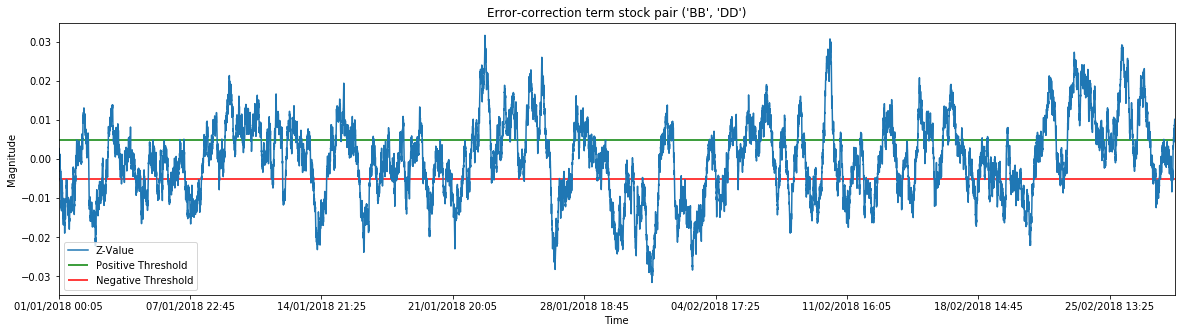

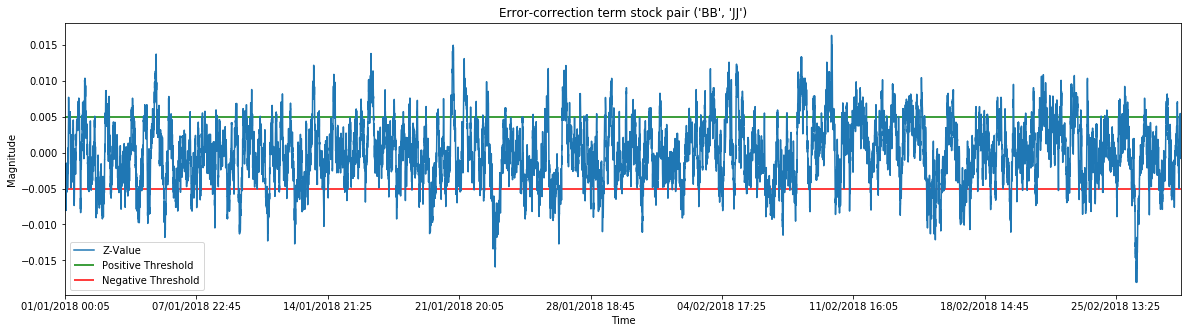

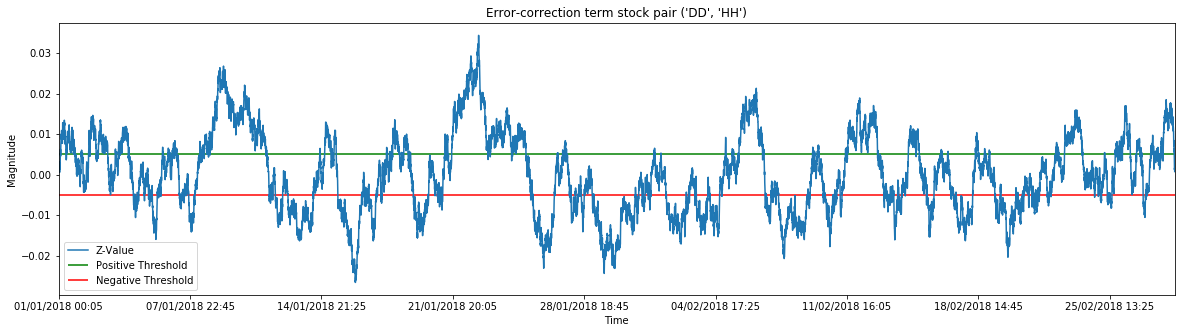

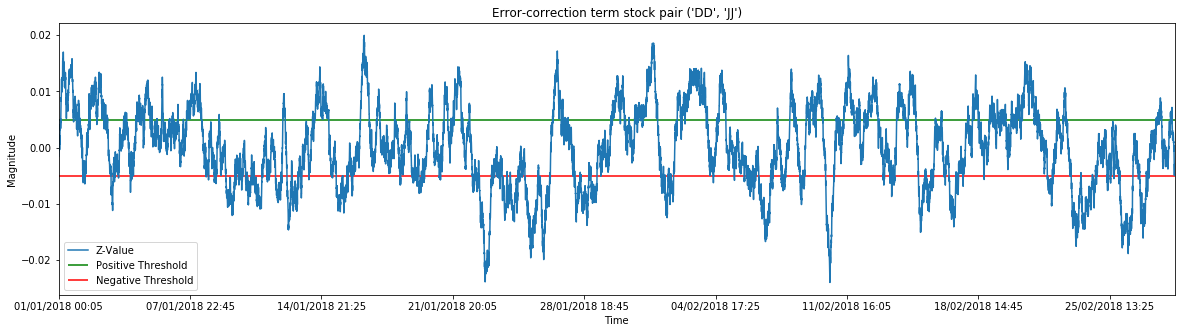

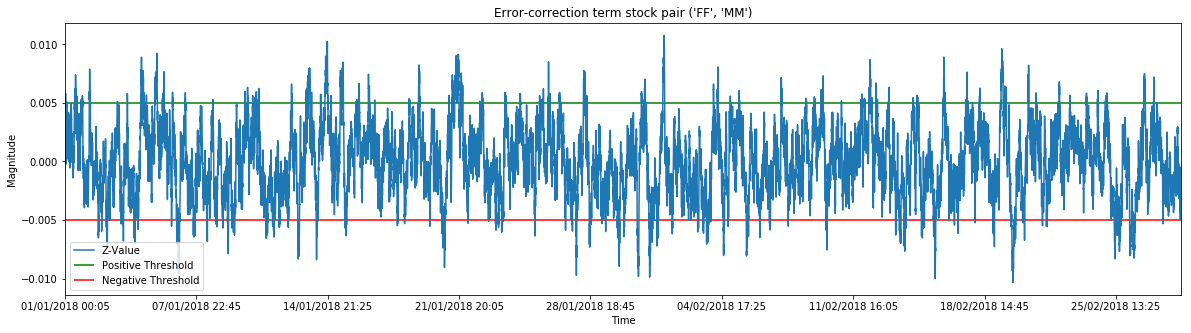

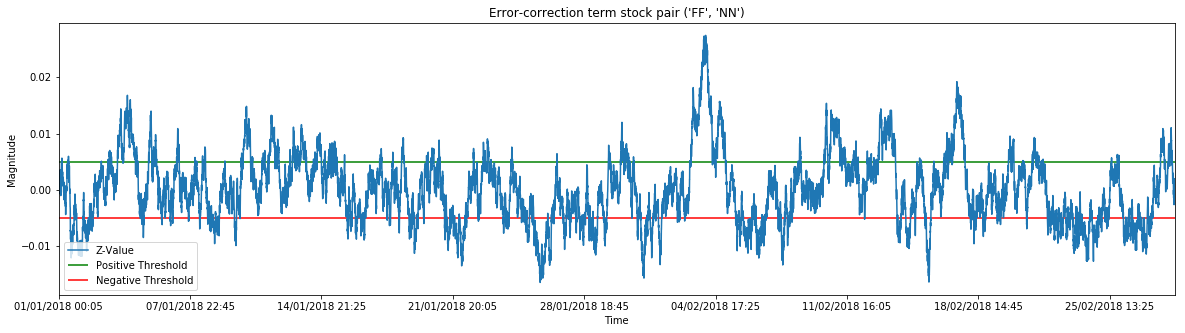

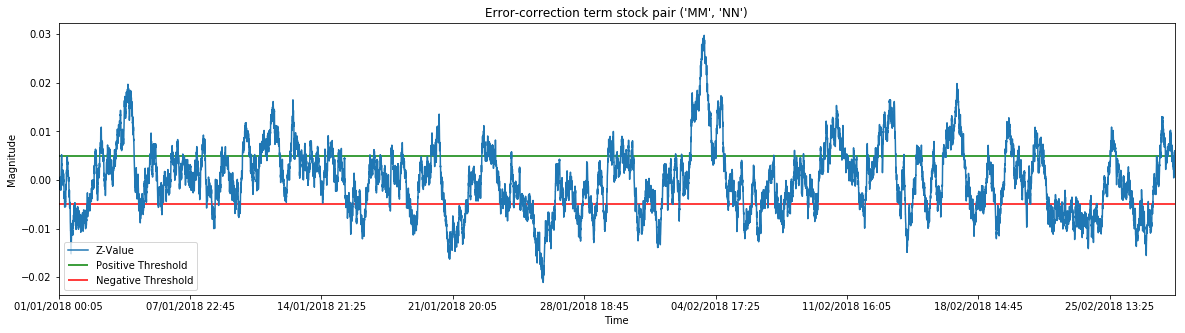

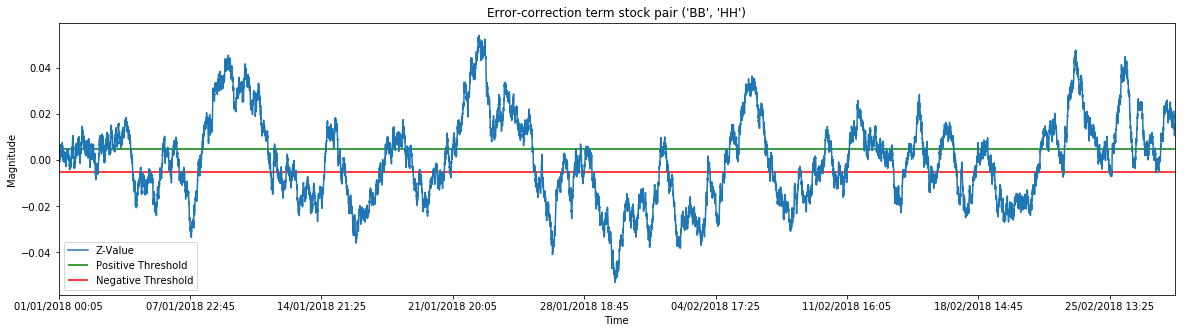

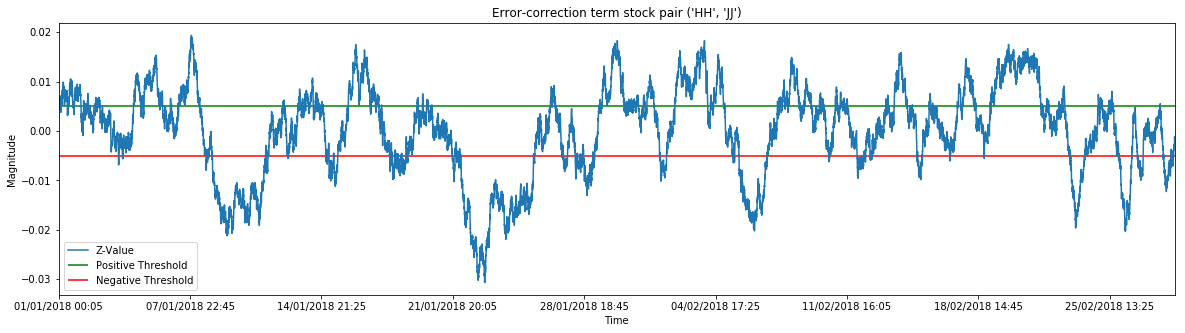

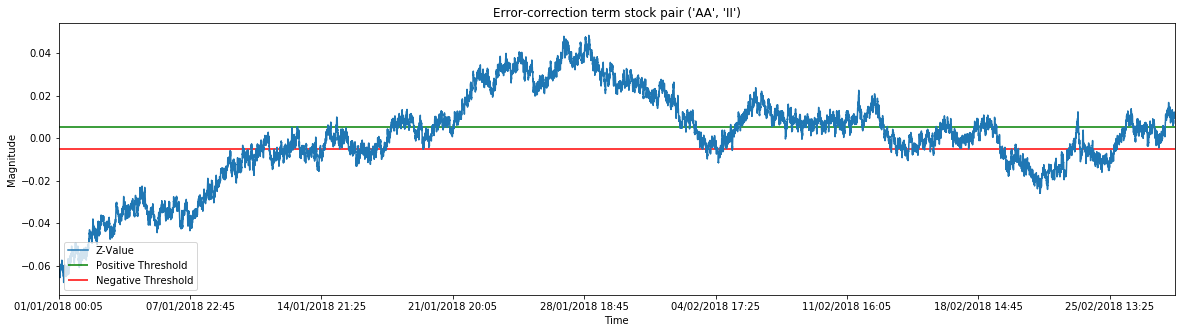

In [14]:
def Plot_Tradable_Z():
    """
    This function plots the z-values of all pairs based on
    the data_zvalues dataframe.
    """
    for pair in stock_pairs: 
        zvalue = data_zvalues[pair]
        plt.figure(figsize=(20,5))
        plt.title('Error-correction term stock pair {}'.format(pair))
        zvalue.plot()
        plt.xlabel('Time')
        plt.ylabel('Magnitude')

        xmin = 0
        xmax = len(zvalue)
        plt.hlines(0.005, xmin, xmax, 'g') # Note 0.005 is randomly chosen
        plt.hlines(-0.005, xmin, xmax, 'r') # Note -0.005 is randomly chosen
        
        plt.legend(['Z-Value', 'Positive Threshold', 'Negative Threshold'], loc='lower left')
        
        plt.show()
        
Plot_Tradable_Z()

This code is defining a function called "Plot_Tradable_Z" that plots the z-values of all pairs based on the data_zvalues dataframe. This function uses a for loop to loop through each pair in the stock_pairs list. It then calculates the z-value for each pair and plots it. The plot has a title indicating which stock pair it is for, and has the time on the x-axis and the magnitude on the y-axis.  The function also adds horizontal lines at positive and negative thresholds, which are randomly chosen values (0.005 and -0.005). The legend of the plot shows the z-value, the positive threshold, and the negative threshold.  After defining the function, it is called at the end of the code using "Plot_Tradable_Z()" to actually execute the function and display the plots. This function can be used to visualize and analyze the z-values of different stock pairs.

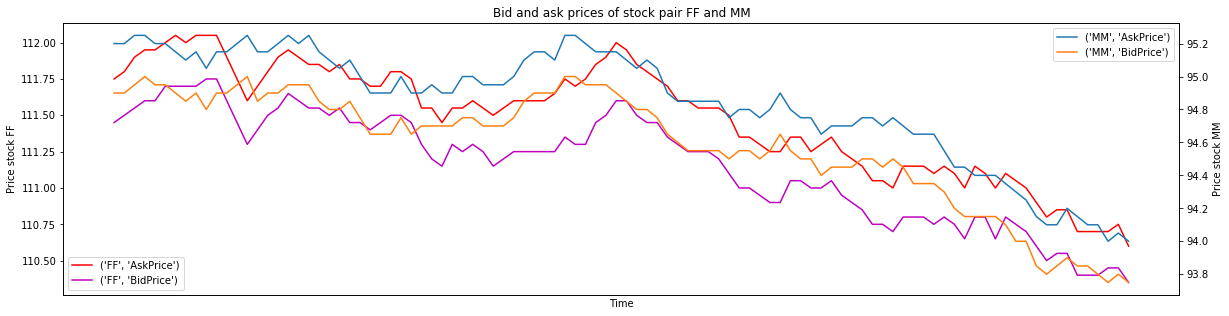

In [15]:
# Select randomly chosen pair from the tradable stock and visualize bid and ask prices, bid and ask volumes, and the z-values
import random

# Choose random stock
random_pair = random.choice(stock_pairs)

# Create a plot showing the bid and ask prices of a randomly chosen stock
def Plot_RandomPair_BidAskPrices():
    """
    This function plots the bid and ask price of a randomly chosen tradable pair.
    """
    plt.figure(figsize=(20,5))
    plt.title('Bid and ask prices of stock pair {} and {}'.format(random_pair[0], random_pair[1]))
    
    plt.plot(tradable_pairs_data[random_pair[0], 'AskPrice'].iloc[:100], 'r')
    plt.plot(tradable_pairs_data[random_pair[0], 'BidPrice'].iloc[:100], 'm')
    plt.xlabel('Time')
    plt.ylabel('Price stock {}'.format(random_pair[0]))
    plt.legend(loc='lower left')
    
    plt.twinx()
    plt.plot(tradable_pairs_data[random_pair[1], 'AskPrice'].iloc[:100])
    plt.plot(tradable_pairs_data[random_pair[1], 'BidPrice'].iloc[:100])
    plt.xticks([])
    plt.ylabel('Price stock {}'.format(random_pair[1]))
    plt.legend(loc='upper right')
    
    plt.show()

Plot_RandomPair_BidAskPrices()

This code imports a library called "random" and uses it to randomly select a pair of stocks from a group of tradable pairs. It then defines a function called "Plot_RandomPair_BidAskPrices" which plots the bid and ask price of the selected pair. The function takes the randomly chosen pair as its input and uses it to plot the bid and ask prices for each stock in the pair on a graph. It also sets the title of the graph to include the names of the two stocks in the pair. The function then uses different colors to plot the bid and ask prices for each stock, and also includes a legend to explain the colors. Finally, it uses the "plt" library to display the graph.

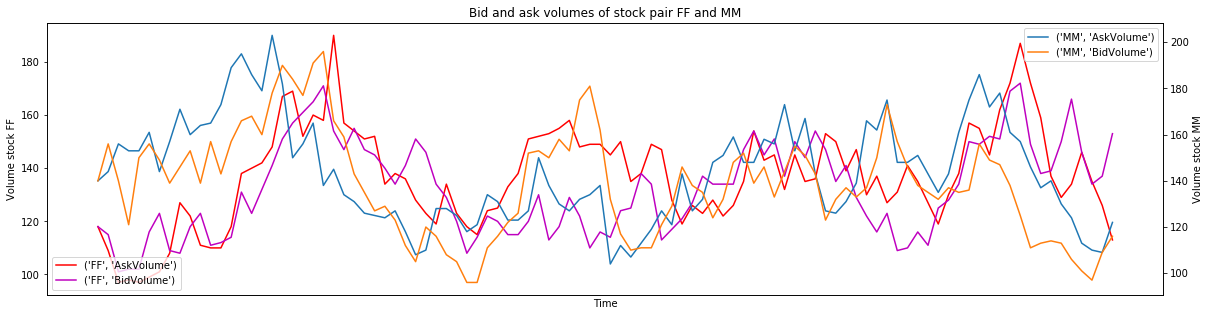

In [16]:
# Create a plot showing the bid and ask volumes of a randomly chosen stock
def Plot_RandomPair_BidAskVolumes(): # Plot not really clarifying, maybe other kind of plot?
    """
    This function plots the bid and ask volumes of a randomly chosen tradable pair.
    """
    plt.figure(figsize=(20,5))
    plt.title('Bid and ask volumes of stock pair {} and {}'.format(random_pair[0],random_pair[1]))
    
    plt.plot(tradable_pairs_data[random_pair[0], 'AskVolume'].iloc[:100], 'r')
    plt.plot(tradable_pairs_data[random_pair[0], 'BidVolume'].iloc[:100], 'm')
    plt.xlabel('Time')
    plt.ylabel('Volume stock {}'.format(random_pair[0]))
    plt.legend(loc='lower left')
    
    plt.twinx()
    plt.plot(tradable_pairs_data[random_pair[1], 'AskVolume'].iloc[:100])
    plt.plot(tradable_pairs_data[random_pair[1], 'BidVolume'].iloc[:100])
    plt.xticks([])
    plt.ylabel('Volume stock {}'.format(random_pair[1]))
    plt.legend(loc='upper right')
    
    plt.show()

Plot_RandomPair_BidAskVolumes()

This code creates a plot showing the bid and ask volumes for two randomly chosen tradable stocks. First, it imports the "onepagecode" substack and defines the function "Plot_RandomPair_BidAskVolumes". The function takes no arguments and has no return value.  Inside the function, a figure is created with a size of 20x5 and a title indicating the two randomly chosen stocks. The bid and ask volumes for the first stock are plotted in red and magenta lines respectively, while the second stock's volumes are plotted as the secondary y-axis. The x-axis represents time and the y-axis represents the volume of stocks being traded. The function then plots the ask and bid volumes for the second stock on the same plot, this time using a different color for each.  The result is a visual representation of how the bid and ask volumes for the two randomly chosen stocks compare to each other over time. This can be useful for analyzing trading patterns and trends for different stocks in relation to each other. Finally, the function calls itself and displays the plotted graph.

In [17]:
# Create a Dataframe containing information about the error-correction term of each pair
data_error_correction_term = {'Pair': [],
                              'CountZeroCrossings': [],
                              'TradingPeriod': [],
                              'LongRunMean': [],
                              'Std': []}

for pair in stock_pairs:
    zvalue = data_zvalues[pair]
    my_array = np.array(zvalue)
    count = ((my_array[:-1] * my_array[1:]) < 0).sum()
    trading_period = 1 / count
    long_run_mean = zvalue.mean()
    std = zvalue.std()

    data_error_correction_term['Pair'].append(pair)
    data_error_correction_term['CountZeroCrossings'].append(count)
    data_error_correction_term['TradingPeriod'].append(trading_period)
    data_error_correction_term['LongRunMean'].append(round(long_run_mean, 4))
    data_error_correction_term['Std'].append(round(std, 4))

data_error_correction_term = pd.DataFrame(data_error_correction_term).set_index('Pair')

data_error_correction_term

CountZeroCrossings  TradingPeriod  LongRunMean     Std
Pair                                                            
(BB, DD)                 660       0.001515         -0.0  0.0100
(BB, JJ)                1475       0.000678         -0.0  0.0044
(DD, HH)                 396       0.002525         -0.0  0.0097
(DD, JJ)                 592       0.001689          0.0  0.0072
(FF, MM)                1413       0.000708          0.0  0.0031
(FF, NN)                 705       0.001418         -0.0  0.0061
(MM, NN)                 627       0.001595          0.0  0.0068
(BB, HH)                 334       0.002994          0.0  0.0181
(HH, JJ)                 363       0.002755         -0.0  0.0090
(AA, II)                 363       0.002755          0.0  0.0214

each loop: This code is designed to perform error correction for a dataset that contains information about stock trading pairs. It initializes an empty dictionary with specific keys to store the relevant data. The code then loops through each stock pair in the stock_pairs variable and calculates a z-value using the data_zvalues for that specific pair. It then converts the z-value array into a numpy array and calculates the number of zero crossings by comparing each element with the next element in the array. This count is then used to calculate the trading period and the long run mean and standard deviation for the z-values of that specific stock pair. The resulting values are then added to the empty dictionary under their respective keys. Finally, the dictionary is converted into a Pandas dataframe and the 'Pair' column is set as the index. This allows for easy visualization and analysis of the error correction data. Essentially, the code is automating a process of calculating important metrics for each stock pair and organizing them into a table for further analysis.

## Threshold Analysis for All Stock Pairs

This section is for discovering what treshold would maximize profits for a given pair. We did many loops over different thresholds to find the ideal level. In the next section, the pairs with the highest profits those that are unique (prevent having a stock as 'BB' be traded twice) will be picked to determine the final profit

In [18]:
# Create a new column within the earlier defined DataFrame with Z-Values of all stock pairs
for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    
    tradable_pairs_data[stock1+stock2, 'Z-Value'] = data_zvalues[stock1,stock2]

C:\Users\jerbo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


This code is using a for loop to iterate through a list called stock_pairs, which contains pairs of stock names. For each pair, the first stock name is assigned to the variable stock1 and the second stock name is assigned to the variable stock2. Then, a new entry is created in a dictionary called tradable_pairs_data. The key for this entry is a combination of the two stock names (stock1+stock2) and the string 'Z-Value'. The value for this entry is taken from another dictionary called data_zvalues, using the stock names as keys. Essentially, this code is taking information from one dictionary and organizing it in a new way in another dictionary, using pairs of stock names as the keys.

In [19]:
# Create a Dictionary that saves all Gamma values of each pair
gamma_dictionary = {}

for pair, value in tradable_pairs_analysis.iterrows():
    gamma_dictionary[pair]= value['Gamma']
    
gamma_dictionary

{('BB', 'DD'): 1.4758,
 ('BB', 'JJ'): 1.6206,
 ('DD', 'HH'): 1.2787,
 ('DD', 'JJ'): 1.0356,
 ('FF', 'MM'): 0.9676,
 ('FF', 'NN'): 1.4881,
 ('MM', 'NN'): 1.5153,
 ('BB', 'HH'): 1.8712,
 ('HH', 'JJ'): 0.7041,
 ('AA', 'II'): 0.9944}

is created as an empty dictionary  The first line of code creates an empty dictionary named "gamma_dictionary". A dictionary is like a list, but instead of storing values in a specific order, it stores them in key-value pairs.   The second line of code starts a for loop. This loop will go through each row in the "tradable_pairs_analysis" table.   The third line of code assigns the "pair" and "value" variables to the values in each row of the "tradable_pairs_analysis" table. This allows us to easily access the values in each row.   The fourth line of code adds a new key-value pair to the "gamma_dictionary" dictionary. The key is set to be the "pair" variable and the value is set to be the "Gamma" value from the "value" variable.   In summary, this code loops through each row in a table and adds the "pair" and "Gamma" values to an empty dictionary called "gamma_dictionary".

In [20]:
# Create a Dictionary that saves all Standard Deviation values of each pair
std_dictionary = {}

for pair, value in data_error_correction_term.iterrows():
    std_dictionary[pair]= value['Std']
    
std_dictionary

{('BB', 'DD'): 0.01,
 ('BB', 'JJ'): 0.0044,
 ('DD', 'HH'): 0.0097,
 ('DD', 'JJ'): 0.0072,
 ('FF', 'MM'): 0.0031,
 ('FF', 'NN'): 0.0061,
 ('MM', 'NN'): 0.0068,
 ('BB', 'HH'): 0.0181,
 ('HH', 'JJ'): 0.009,
 ('AA', 'II'): 0.0214}

[time] = value['std']  This python code creates an empty dictionary called "std_dictionary". It then iterates through the rows in the "data_error_correction_term" data set and adds pairs and corresponding values to the dictionary. The pairs are used as keys in the dictionary and the corresponding values are assigned to those keys. It also creates another key called "time" and assigns the value from the "std" column in the data set to it. Essentially, this code is creating a dictionary that can be used to store and access standardized data values from the "data_error_correction_term" data set.

This is our Algorithm for finding the correct thresholds that are able to generate the greatest amount of profit. We find it important to <b>not</b> <i>maximize</i> the profit because what holds for historic data is not guaranteed to hold for future data. We therefore specify a limited selection of thresholds with a linspace.

In [21]:
positions = {}
limit = 100

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    
    gamma = gamma_dictionary[stock1,stock2]
    
    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1,stock2]
        
        current_position_stock1 = 0 
        current_position_stock2 = 0 
        
        column_name_stock1 = stock1 + ' Pos - Thres: ' + str(threshold)
        
        BidPrice_Stock1 = tradable_pairs_data[stock1,'BidVolume'][0]
        AskPrice_Stock1 = tradable_pairs_data[stock1,'AskVolume'][0]
        BidPrice_Stock2 = tradable_pairs_data[stock2,'BidVolume'][0]
        AskPrice_Stock2 = tradable_pairs_data[stock1,'AskVolume'][0]
        
        positions[column_name_stock1] = []
        
        for time, data_at_time in tradable_pairs_data.iterrows():
            
            BidVolume_Stock1 = data_at_time[stock1, 'BidVolume']
            AskVolume_Stock1 = data_at_time[stock1, 'AskVolume']
            BidVolume_Stock2 = data_at_time[stock2, 'BidVolume']
            AskVolume_Stock2 = data_at_time[stock2, 'AskVolume']
            
            zvalue = data_at_time[stock1+stock2,'Z-Value']

            # If the zvalues of (BB,DD) are high the spread diverges, i.e. sell BB (=stock1=y) and buy DD (=stock2=x)
            if zvalue >= threshold:
                hedge_ratio = gamma * (BidPrice_Stock1 / AskPrice_Stock2)
                
                if hedge_ratio >= 1:

                    max_order_stock1 = current_position_stock1 + limit
                    max_order_stock2 = max_order_stock1 / hedge_ratio

                    trade = np.floor(min((BidVolume_Stock1 / hedge_ratio), AskVolume_Stock2, max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((- trade * hedge_ratio) + current_position_stock1)

                    current_position_stock1 = ((- trade * hedge_ratio) + current_position_stock1)
                
                elif hedge_ratio < 1:

                    max_order_stock1 = current_position_stock1 + limit
                    max_order_stock2 = max_order_stock1 * hedge_ratio

                    trade = np.floor(min((BidVolume_Stock1 * hedge_ratio), AskVolume_Stock2, max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((- trade / hedge_ratio) + current_position_stock1)

                    current_position_stock1 = ((- trade / hedge_ratio) + current_position_stock1)

            elif zvalue <= -threshold:
                hedge_ratio = gamma * (AskPrice_Stock1 / BidPrice_Stock2)
                
                if hedge_ratio >= 1:

                    max_order_stock1 = abs(current_position_stock1 - limit)
                    max_order_stock2 = max_order_stock1 / hedge_ratio

                    trade = np.floor(min((AskVolume_Stock1 / hedge_ratio), BidVolume_Stock2, max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((+ trade * hedge_ratio) + current_position_stock1)

                    current_position_stock1 = (+ trade * hedge_ratio) + current_position_stock1

                elif hedge_ratio < 1:
                    
                    max_order_stock1 = abs(current_position_stock1 - limit)
                    max_order_stock2 = max_order_stock1 * hedge_ratio

                    trade = np.floor(min((AskVolume_Stock1 * hedge_ratio), BidVolume_Stock2, max_order_stock1, max_order_stock2))

                    positions[column_name_stock1].append((+ trade / hedge_ratio) + current_position_stock1)

                    current_position_stock1 = (+ trade / hedge_ratio) + current_position_stock1  
                
                BidPrice_Stock1 = data_at_time[stock1, 'BidPrice']
                AskPrice_Stock1 = data_at_time[stock1, 'AskPrice']
                BidPrice_Stock2 = data_at_time[stock2, 'BidPrice']
                AskPrice_Stock2 = data_at_time[stock2, 'AskPrice']

            else:
                    positions[column_name_stock1].append(current_position_stock1)
        
        column_name_stock2 = stock2 + ' Pos - Thres: ' + str(threshold)
        
        if hedge_ratio >= 1:
            positions[column_name_stock2] = positions[column_name_stock1] / hedge_ratio * -1
        
        elif hedge_ratio < 1:
            positions[column_name_stock2] = positions[column_name_stock1] / (1 / hedge_ratio) * -1

This code calculates trading positions for two stocks using a gamma dictionary and a standard deviation dictionary. For each stock pair in a list of stock pairs, the code finds the value of gamma (a measure of the relationship between the price movements of two stocks) and creates a threshold for trading.  Then, the code iterates through a range of values between 0.05 and 1.0 and calculates the current positions for each stock based on the bid and ask prices. These positions are stored in a positions dictionary. If the z-value - which indicates the price relationship between the two stocks - is above the threshold, the code calculates and executes trades using the bid and ask volumes and the maximum order size, based on the hedge ratio (calculated using the gamma value). If the z-value is below the threshold, the code does the same but with a different hedge ratio.  Finally, the code updates the positions for each stock and calculates the positions for the other stock in the pair based on the hedge ratio. These positions are also stored in the positions dictionary, along with the corresponding threshold for each pair.

In [22]:
# Create a seperate dataframe (to keep the original dataframe intact) with rounding
# Also insert the timestamp, as found in the tradeable_pairs_data DataFrame
positions_final = np.ceil(pd.DataFrame(positions))
positions_final['Timestamp'] = tradable_pairs_data.index
positions_final = positions_final.set_index('Timestamp')

This code takes a list of positions and converts it into a pandas DataFrame. It then rounds the numerical values in the DataFrame up and assigns it to a new variable called "positions_final".   Next, it creates a new column in the DataFrame called "Timestamp" and assigns it the index values from a data source called "tradable_pairs_data". It then sets the index of the DataFrame to be the values in the "Timestamp" column.   In summary, this code converts a list of positions into a DataFrame and adds a new column with timestamp data as the index. This allows for easier manipulation and analysis of the data.

In [23]:
# The difference between the positions
positions_diff = positions_final.diff()[1:]

# Positions_diff first rows
positions_diff.head()

# OPTIONAL to Excel to Save the Amount of Trades
# positions_diff[(positions_diff != 0)].count().to_excel('Thresholds.xlsx')

BB Pos - Thres: 0.0005  DD Pos - Thres: 0.0005  \
Timestamp                                                          
01/01/2018 00:10                     0.0                     0.0   
01/01/2018 00:15                     0.0                     0.0   
01/01/2018 00:20                     0.0                     0.0   
01/01/2018 00:25                     0.0                     0.0   
01/01/2018 00:30                   132.0                  -106.0   

                  BB Pos - Thres: 0.0015555555555555557  \
Timestamp                                                 
01/01/2018 00:10                                    0.0   
01/01/2018 00:15                                  -98.0   
01/01/2018 00:20                                    0.0   
01/01/2018 00:25                                    0.0   
01/01/2018 00:30                                    0.0   

                  DD Pos - Thres: 0.0015555555555555557  \
Timestamp                                                 
01/01/2018 00:10                                    0.0   
01/01/2018 00:15                                   80.0   
01/01/2018 00:20                                    0.0   
01/01/2018 00:25                                    0.0   
01/01/2018 00:30                                    0.0   

                  BB Pos - Thres: 0.0026111111111111114  \
Timestamp                                                 
01/01/2018 00:10                                    0.0   
01/01/2018 00:15                                  -98.0   
01/01/2018 00:20                                    0.0   
01/01/2018 00:25                                    0.0   
01/01/2018 00:30                                    0.0   

                  DD Pos - Thres: 0.0026111111111111114  \
Timestamp                                                 
01/01/2018 00:10                                    0.0   
01/01/2018 00:15                                   80.0   
01/01/2018 00:20                                    0.0   
01/01/2018 00:25                                    0.0   
01/01/2018 00:30                                    0.0   

                  BB Pos - Thres: 0.0036666666666666666  \
Timestamp                                                 
01/01/2018 00:10                                    0.0   
01/01/2018 00:15                                    0.0   
01/01/2018 00:20                                    0.0   
01/01/2018 00:25                                    0.0   
01/01/2018 00:30                                    0.0   

                  DD Pos - Thres: 0.0036666666666666666  \
Timestamp                                                 
01/01/2018 00:10                                    0.0   
01/01/2018 00:15                                    0.0   
01/01/2018 00:20                                    0.0   
01/01/2018 00:25                                    0.0   
01/01/2018 00:30                                    0.0   

                  BB Pos - Thres: 0.004722222222222222  \
Timestamp                                                
01/01/2018 00:10                                   0.0   
01/01/2018 00:15                                   0.0   
01/01/2018 00:20                                   0.0   
01/01/2018 00:25                                   0.0   
01/01/2018 00:30                                   0.0   

                  DD Pos - Thres: 0.004722222222222222  ...  \
Timestamp                                               ...   
01/01/2018 00:10                                   0.0  ...   
01/01/2018 00:15                                   0.0  ...   
01/01/2018 00:20                                   0.0  ...   
01/01/2018 00:25                                   0.0  ...   
01/01/2018 00:30                                   0.0  ...   

                  AA Pos - Thres: 0.012364444444444445  \
Timestamp                                                
01/01/2018 00:10                                   0.0   
01/01/2018 00:15                  

This code appears to be working with a data set of positions, perhaps in some sort of financial context. The first line creates a variable called "positions_diff" and assigns it the result of applying the "diff()" function to a variable called "positions_final." The "[1:]" after the function tells the code to exclude the first row of data. The "head()" function then shows the first few rows of the resulting data. Therefore, this code is computing the difference between each position and the previous one, and then displaying the first few rows of that data. This allows the user to see how the positions change over time and potentially identify trends or patterns in the data.

This method is used to value our last position by the correct market value. This to ensure that in the time between our last trade and the last timestamp does not hold any secrets (a market crash for example) that are not calculated in the PnL. One could say the profit is for example €50.000 while it is actually far lower because our positions are worth next to nothing due to a market crash.

In [24]:
positions_diff[-1:] = -positions_final[-1:]

This Python code involves working with two lists, namely "positions_diff" and "positions_final". The first list is taking the last element of the second list and changing its sign to negative. It then replaces the last element of the first list with this updated element. In simple terms, it is copying the value of the last element in the second list and changing it to its negative counterpart, and then updating the last element in the first list with this new value.

To determine which threshold is the most profitable, we determine the PnL of each combination of pair and threshold. 

In [25]:
pnl_dataframe = pd.DataFrame()

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]

    Stock1_AskPrice = tradable_pairs_data[stock1, 'AskPrice'][1:]
    Stock1_BidPrice = tradable_pairs_data[stock1, 'BidPrice'][1:]
    Stock2_AskPrice = tradable_pairs_data[stock2, 'AskPrice'][1:]
    Stock2_BidPrice = tradable_pairs_data[stock2, 'BidPrice'][1:]

    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1, stock2]

        column_name_1 = stock1 + ' Pos - Thres: ' + str(threshold)
        column_name_2 = stock2 + ' Pos - Thres: ' + str(threshold)

        pnl_dataframe[stock1 + str(threshold)] = np.where(positions_diff[column_name_1] > 0,
                                                          positions_diff[column_name_1] * -Stock1_BidPrice, positions_diff[column_name_1] * -Stock1_AskPrice)
        pnl_dataframe[stock2 + str(threshold)] = np.where(positions_diff[column_name_2] > 0,
                                                          positions_diff[column_name_2] * -Stock2_BidPrice, positions_diff[column_name_2] * -Stock2_AskPrice)

pnl_dataframe.head()

BB0.0005  DD0.0005  BB0.0015555555555555557  DD0.0015555555555555557  \
0      -0.0      -0.0                     -0.0                     -0.0   
1      -0.0      -0.0                   9893.1                  -9352.0   
2      -0.0      -0.0                     -0.0                     -0.0   
3      -0.0      -0.0                     -0.0                     -0.0   
4  -13259.4   12439.1                     -0.0                     -0.0   

   BB0.0026111111111111114  DD0.0026111111111111114  BB0.0036666666666666666  \
0                     -0.0                     -0.0                     -0.0   
1                   9893.1                  -9352.0                     -0.0   
2                     -0.0                     -0.0                     -0.0   
3                     -0.0                     -0.0                     -0.0   
4                     -0.0                     -0.0                     -0.0   

   DD0.0036666666666666666  BB0.004722222222222222  DD0.004722222222222222  \
0                     -0.0                    -0.0                    -0.0   
1                     -0.0                    -0.0                    -0.0   
2                     -0.0                    -0.0                    -0.0   
3                     -0.0                    -0.0                    -0.0   
4                     -0.0                    -0.0                    -0.0   

   ...  AA0.012364444444444445  II0.012364444444444445  \
0  ...                    -0.0                    -0.0   
1  ...                    -0.0                    -0.0   
2  ...                    -0.0                    -0.0   
3  ...                    -0.0                    -0.0   
4  ...                    -0.0                    -0.0   

   AA0.014623333333333334  II0.014623333333333334  AA0.016882222222222222  \
0                    -0.0                    -0.0                    -0.0   
1                    -0.0                    -0.0                    -0.0   
2                    -0.0                    -0.0                    -0.0   
3                    -0.0                    -0.0                    -0.0   
4                    -0.0                    -0.0                    -0.0   

   II0.016882222222222222  AA0.019141111111111112  II0.019141111111111112  \
0                    -0.0                    -0.0                    -0.0   
1                    -0.0                    -0.0                    -0.0   
2                    -0.0                    -0.0                    -0.0   
3                    -0.0                    -0.0                    -0.0   
4                    -0.0                    -0.0                    -0.0   

   AA0.0214  II0.0214  
0      -0.0      -0.0  
1      -0.0      -0.0  
2      -0.0      -0.0  
3      -0.0      -0.0  
4      -0.0      -0.0  

[5 rows x 200 columns]

This code is creating a dataframe called "pnl_dataframe" and filling it with information related to stock pairs. It first goes through a list of stock pairs and for each pair, it stores the first and second stock as variables. Then, it retrieves the ask and bid prices for both stocks from a dataset called "tradable_pairs_data" and stores them as additional variables.   Next, the code goes through a for loop that iterates through a range of values from 0.05 to 1.0, with increments of 0.05. For each value, it calculates a threshold by multiplying the value by the standard deviation of the stock pair. It then creates two column names using the stock names and the threshold value.   In the last two lines, the code fills the dataframe with information for each stock at each threshold value. It uses the "np.where" function to check if the value in the "positions_diff" column is greater than 0, and if it is, it calculates the profit or loss by multiplying the value by the negative bid or ask price of the respective stock. This information is then stored in the dataframe under the appropriate column name. Finally, the code displays the first five rows of the dataframe.

In [26]:
# Create Columns for the pnl_threshold dataframe
pairs = []
thresholds = []

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]

    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1, stock2]
        pair = stock1, stock2
        pairs.append(pair)
        thresholds.append(threshold)

This python code is creating a list called "pairs" and a list called "thresholds". Then, for each pair in the list "stock_pairs", it is assigning the first element of the pair to a variable called "stock1" and the second element to a variable called "stock2".   Next, it uses a numpy function to create a range of numbers from 0.05 to 1.0, with 10 evenly-spaced intervals. For each number in this range, it multiplies it by the standard deviation dictionary of the pair (stock1 and stock2) and assigns it to a variable called "threshold". This threshold is then added to the "thresholds" list.   Finally, the original pair (stock1 and stock2) is added to the "pairs" list. This process is repeated for each pair in the "stock_pairs" list, resulting in the "pairs" and "thresholds" lists being filled with corresponding pairs and thresholds respectively.

In [27]:
# Include columns and append PnLs
pnl_threshold = {'Pairs' : pairs,
                 'Thresholds': thresholds,
                 'PnLs' : []}

for pair in stock_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    
    for i in np.linspace(0.05, 1.0, 10):
        threshold = i * std_dictionary[stock1,stock2]
        pnl_threshold['PnLs'].append(pnl_dataframe[stock1 + str(threshold)].sum() + pnl_dataframe[stock2 + str(threshold)].sum())
        
pnl_threshold = pd.DataFrame(pnl_threshold)
pnl_threshold = pnl_threshold.set_index('Pairs')
# pnl_threshold.to_excel('Thresholds.xlsx')

This code creates a dictionary called pnl_threshold with three keys: 'Pairs', 'Thresholds', and 'PnLs'. The value for the 'Pairs' key is a list of stock pairs, the value for the 'Thresholds' key is a list of thresholds, and the value for the 'PnLs' key is an empty list. This dictionary is then looped through for each pair in stock_pairs. Within this loop, the first and second element of each pair are assigned to variables stock1 and stock2. Then, a new loop is created within the first loop that iterates through a sequence of numbers between 0.05 and 1.0 with a step size of 0.05. Within each iteration, a threshold is calculated by multiplying the current number by a value in std_dictionary at the indices of stock1 and stock2. This threshold is then used to access values in a dataframe called pnl_dataframe and add them to the 'PnLs' list in pnl_threshold. After the loops finish, the code converts the dictionary to a dataframe and sets the 'Pairs' column as the index. As a result, the dataframe includes columns for thresholds and PnLs, with each row representing a stock pair and the corresponding values for those columns. Overall, the code is likely used for analyzing the performance of different threshold values for trading a pair of stocks.

In [28]:
# Find Highest PnLs
highest_pnls = pnl_threshold.groupby(by='Pairs').agg({'PnLs' : max})
highest_pnls.sort_values('PnLs', ascending=False)

PnLs
Pairs             
(FF, MM)  59186.40
(BB, JJ)  46740.30
(FF, NN)  29441.50
(BB, DD)  26140.55
(MM, NN)  21508.00
(DD, JJ)  19887.50
(DD, HH)  19541.65
(BB, HH)  16306.90
(AA, II)  10433.60
(HH, JJ)   5390.10

This code uses the "groupby" function to group the data in the "pnl_threshold" variable by the "Pairs" column. Then, the "agg" function is used to calculate the maximum ("max") value of the "PnLs" column for each group. The resulting data is stored in a variable called "highest_pnls". Finally, the "sort_values" function is used to sort the data in the "highest_pnls" variable in descending order based on the values in the "PnLs" column. This code essentially finds the highest profit and loss (PnL) value for each pair in the data and sorts them from highest to lowest.

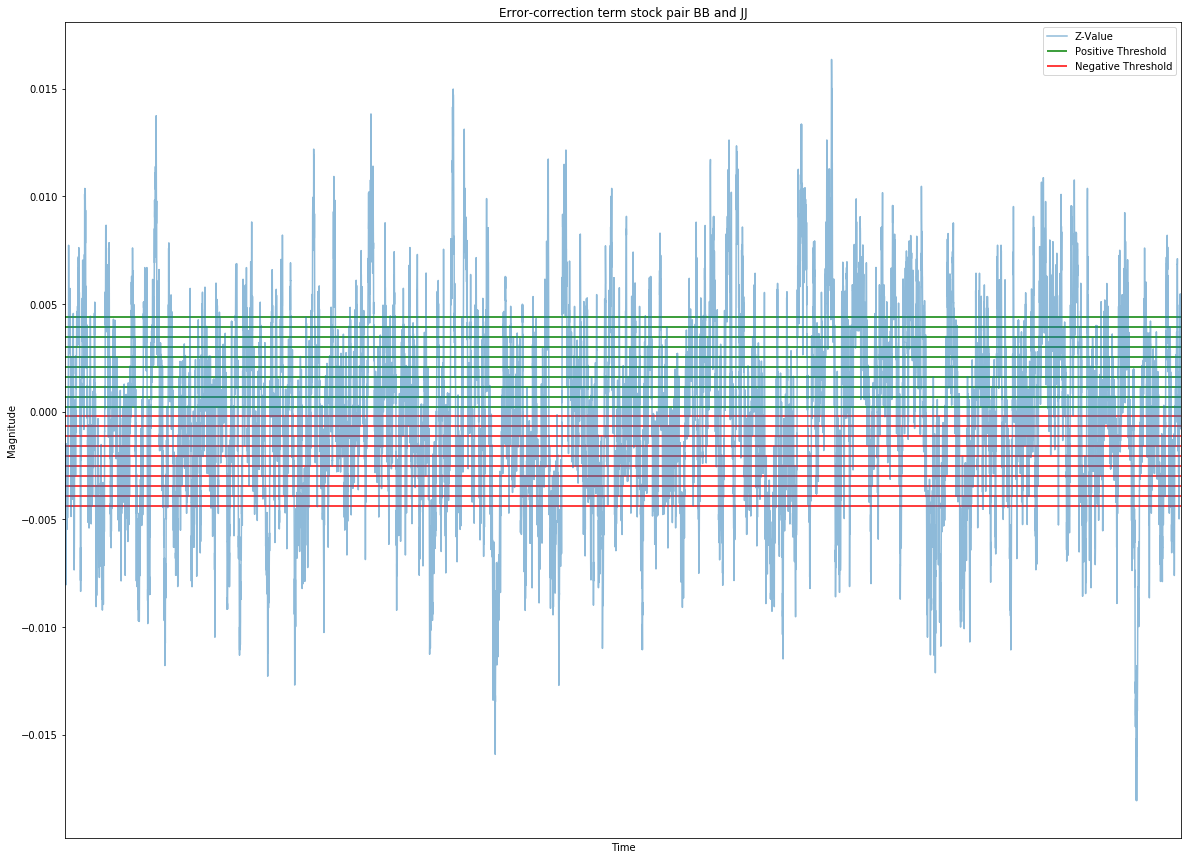

In [29]:
# Plot error-correction term (z-value) to observe what the spread looks like (see slide for comparison plot cointegrated pair)
def Plot_Thresholds(stock1, stock2):
    zvalue = tradable_pairs_data[stock1+stock2,'Z-Value']
    plt.figure(figsize=(20,15))
    plt.xticks([])
    plt.title('Error-correction term stock pair ' + stock1 + ' and ' + stock2)
    zvalue.plot(alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    xmin = 0
    xmax = len(zvalue)
    
    # Boundries chosen to give an approximate good fit
    plt.hlines(pnl_threshold['Thresholds'][10:20], xmin, xmax, 'g')  
    plt.hlines(-pnl_threshold['Thresholds'][10:20], xmin, xmax, 'r')
    
    plt.legend(['Z-Value', 'Positive Threshold', 'Negative Threshold'])
    plt.show()
        
Plot_Thresholds('BB','JJ')

This code is a function called "Plot_Thresholds" that takes two stock names as arguments, "stock1" and "stock2". The function retrieves data from a variable called "tradable_pairs_data" by combining the two stock names with a "+" symbol and retrieving the "Z-Value". It then creates a figure with a size of 20 by 15 and hides the x-axis ticks. The title of the figure includes the names of the two stocks. The "Z-Value" data is then plotted on the figure with an alpha value of 0.5 (to make it partially transparent).  The function then adds an x-label of "Time" and a y-label of "Magnitude" to the figure. It also sets the minimum and maximum values for the x-axis, with the minimum being 0 and the maximum being the length of the "Z-Value" data. The function then adds two horizontal lines to the figure using the "pnl_threshold" variable, one for positive threshold values and one for negative threshold values. The legend of the figure is then set to show the names of the lines added (the "Z-Value" line and the two threshold lines).  Finally, the function displays the figure using the "plt.show()" command, passing in the names of the two stocks as arguments for the function. In this case, the function is called with the stock names "BB" and "JJ". The purpose of this code is to plot the "Z-Value" data for a pair of stocks, along with positive and negative threshold lines to help analyze the performance of the stock pair.

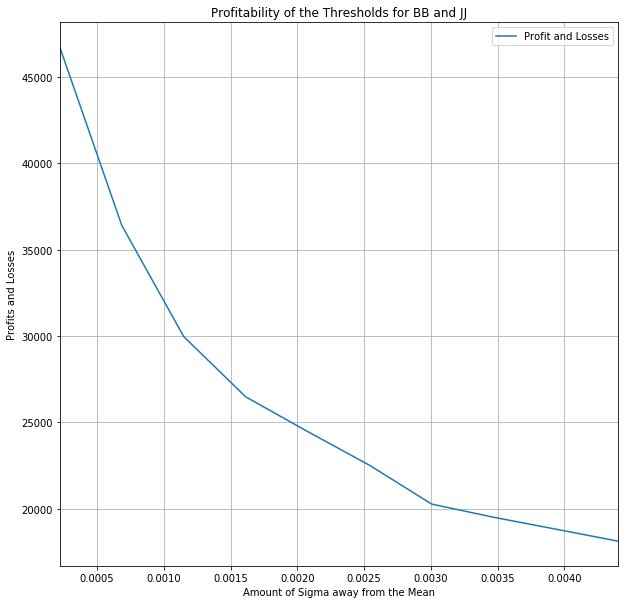

In [30]:
# Create a Plot that displays the Profitability of the Thresholds

def profitability_of_the_thresholds(stock1, stock2):
    pnl_threshold[(pnl_threshold.index == (stock1, stock2))].plot(x='Thresholds', y='PnLs', figsize=(10,10))
    plt.title('Profitability of the Thresholds for ' + stock1 + ' and ' + stock2)
    plt.xlabel('Amount of Sigma away from the Mean')
    plt.ylabel('Profits and Losses')
    plt.legend(['Profit and Losses'])
    plt.grid()

profitability_of_the_thresholds('BB','JJ')

This python code is defining a function called "profitability_of_the_thresholds" that takes two parameters, "stock1" and "stock2". The function uses a pandas dataframe called "pnl_threshold" to plot the profitability of the two stocks (stock1 and stock2) based on different thresholds. These thresholds represent the number of standard deviations away from the average value of the stocks. The code then adds a title, x-axis label, y-axis label, and legend to the plot, and displays a grid. Finally, the function is called with two specific stocks, BB and JJ, and the resulting plot shows the profitability of these stocks at different thresholds. The function essentially helps visualize the profitability of different thresholds for two given stocks.

# Algorithm Strategy 1

Making use of the previous analysis to determine which pairs should be traded. Based on that the algorithm, with slight modifications, is ran again to calculate the final profits.

In [31]:
# Determine the treshold, manually chosen based on pnl_threshold and ensuring no overlap.
threshold_dictionary = {('BB', 'JJ'): 0.000220,
                        ('FF', 'MM'): 0.000155,
                        ('DD', 'HH'): 0.000485,
                        ('AA', 'II'): 0.001070}

threshold_dictionary

{('BB', 'JJ'): 0.00022,
 ('FF', 'MM'): 0.000155,
 ('DD', 'HH'): 0.000485,
 ('AA', 'II'): 0.00107}

is a dictionary that stores key-value pairs. Each pair consists of two tuples, where the first element represents a category and the second element represents another category. These categories are represented by a combination of two letters. The value associated with each pair is a decimal number. It is a threshold that is used to compare two categories. If the value associated with a pair is greater than a given input, then the two categories are considered similar. Otherwise, they are considered different. This dictionary can be used to categorize items based on their similarities and differences.

In [33]:
# Selection of the final pairs for this trading strategy
stock_pairs_final = [('BB', 'JJ'),
                     ('FF', 'MM'),
                     ('DD', 'HH'),
                     ('AA', 'II')]

stock_pairs_final

[('BB', 'JJ'), ('FF', 'MM'), ('DD', 'HH'), ('AA', 'II')]

= [('BB', 'JJ'), ('FF', 'MM')] This code creates a list called stock_pairs_final and assigns it with tuples of two stock pairs. The first line creates a list of four tuples, with each tuple representing a stock pair. The stocks within each tuple are denoted by two capital letters. The second line reassigns the list stock_pairs_final to only include the first two tuples from the original list of four. In other words, the code filters out the last two stock pairs from the list and only keeps the first two. This could be useful if there was a specific requirement to only consider a certain number of stock pairs.

This algorithm is a slight modification as the previous one used. In this algorithm we incorporate the chosen pairs, with the corresponding tresholds, to determine the most optimal positions.

In [34]:
positions_strategy_1 = {}
limit = 100

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]
    
    gamma = gamma_dictionary[stock1,stock2]
    
    threshold = threshold_dictionary[stock1,stock2]
        
    current_position_stock1 = 0 
    current_position_stock2 = 0 
        
    positions_strategy_1[stock1] = []

    for time, data_at_time in tradable_pairs_data.iterrows():

        BidPrice_Stock1 = data_at_time[stock1, 'BidPrice']
        AskPrice_Stock1 = data_at_time[stock1, 'AskPrice']
        BidPrice_Stock2 = data_at_time[stock2, 'BidPrice']
        AskPrice_Stock2 = data_at_time[stock2, 'AskPrice']

        BidVolume_Stock1 = data_at_time[stock1, 'BidVolume']
        AskVolume_Stock1 = data_at_time[stock1, 'AskVolume']
        BidVolume_Stock2 = data_at_time[stock2, 'BidVolume']
        AskVolume_Stock2 = data_at_time[stock2, 'AskVolume']

        zvalue = data_at_time[stock1+stock2,'Z-Value']

        if zvalue >= threshold:
            hedge_ratio = gamma * (BidPrice_Stock1 / AskPrice_Stock2)
                
            if hedge_ratio >= 1:

                max_order_stock1 = current_position_stock1 + limit
                max_order_stock2 = max_order_stock1 / hedge_ratio

                trade = np.floor(min((BidVolume_Stock1 / hedge_ratio), AskVolume_Stock2, max_order_stock1, max_order_stock2))

                positions_strategy_1[stock1].append((- trade * hedge_ratio) + current_position_stock1)

                current_position_stock1 = ((- trade * hedge_ratio) + current_position_stock1)
                
            elif hedge_ratio < 1:

                max_order_stock1 = current_position_stock1 + limit
                max_order_stock2 = max_order_stock1 * hedge_ratio

                trade = np.floor(min((BidVolume_Stock1 * hedge_ratio), AskVolume_Stock2, max_order_stock1, max_order_stock2))

                positions_strategy_1[stock1].append((- trade / hedge_ratio) + current_position_stock1)

                current_position_stock1 = ((- trade / hedge_ratio) + current_position_stock1)

        elif zvalue <= -threshold:
            hedge_ratio = gamma * (AskPrice_Stock1 / BidPrice_Stock2)
                
            if hedge_ratio >= 1:

                max_order_stock1 = abs(current_position_stock1 - limit)
                max_order_stock2 = max_order_stock1 / hedge_ratio

                trade = np.floor(min((AskVolume_Stock1 / hedge_ratio), BidVolume_Stock2, max_order_stock1, max_order_stock2))

                positions_strategy_1[stock1].append((+ trade * hedge_ratio) + current_position_stock1)

                current_position_stock1 = (+ trade * hedge_ratio) + current_position_stock1

            elif hedge_ratio < 1:
                    
                max_order_stock1 = abs(current_position_stock1 - limit)
                max_order_stock2 = max_order_stock1 * hedge_ratio

                trade = np.floor(min((AskVolume_Stock1 * hedge_ratio), BidVolume_Stock2, max_order_stock1, max_order_stock2))

                positions_strategy_1[stock1].append((+ trade / hedge_ratio) + current_position_stock1)

                current_position_stock1 = (+ trade / hedge_ratio) + current_position_stock1   

        else:

                positions_strategy_1[stock1].append(current_position_stock1)
        
    if hedge_ratio >= 1:
        positions_strategy_1[stock2] = positions_strategy_1[stock1] / hedge_ratio * -1
        
    elif hedge_ratio < 1:
        positions_strategy_1[stock2] = positions_strategy_1[stock1] / (1 / hedge_ratio) * -1

The code is implementing a trading strategy for a pair of stocks. It creates a dictionary called positions_strategy_1 and sets an upper limit for trading at 100. It then iterates through a list of stock pairs and calculates the gamma and threshold for each pair. The code then initializes variables for the current positions of each stock and creates an empty list for the positions of stock1.   The code then enters a for loop for each time and data point in the tradable_pairs_data. Within this for loop, it calculates the BidPrice, AskPrice, BidVolume, AskVolume, and z-value for each stock. It then checks if the z-value is above the threshold. If it is, it calculates the hedge ratio using the gamma and the BidPrice and AskPrice for each stock.   If the hedge ratio is greater than or equal to 1, the code calculates the maximum order quantity for each stock based on the current position and the limit. It then executes the trade by taking the minimum of the BidVolume for stock1 divided by the hedge ratio, the Ask Volume for stock2, and the maximum order quantities for each stock. The code then stores the trade in the positions_strategy_1 dictionary and updates the current position for stock1.  If the hedge ratio is less than 1, the code follows the same process but uses BidVolume for stock1 multiplied by the hedge ratio instead.  If the z-value is below the negative threshold, the code performs similar calculations but uses the AskPrice for stock1 and the BidPrice for stock2 to calculate the hedge ratio. The code also checks if the hedge ratio is greater than or less than 1 and performs the appropriate calculations.  Finally, if the z-value is not above or below the thresholds, the code simply stores the current position for stock1 in the positions_strategy_1 dictionary.  After the for loop, the code checks the hedge ratio again and sets the positions for stock2 by dividing or multiplying the positions for stock1 by 1/hedge ratio and multiplying by -1 to indicate a short position.  In summary,
the code is using statistical measures to determine when to trade and how much to trade for a pair of stocks. It also takes into account the current positions and limits for each stock.

In [35]:
# Set Ceiling (to prevent positions with not enough volume available) as well as define the timestamp
positions_strategy_1 = np.ceil(pd.DataFrame(positions_strategy_1))
positions_strategy_1['Timestamp'] = tradable_pairs_data.index
positions_strategy_1 = positions_strategy_1.set_index('Timestamp')

This code converts a pandas DataFrame called "positions_strategy_1" into a NumPy array and then rounds all of the values in the array up to the nearest whole number. It then adds a column called "Timestamp" to the DataFrame using the index values from a separate DataFrame called "tradable_pairs_data". Finally, it sets the index of "positions_strategy_1" to be the newly added "Timestamp" column. Overall, the code is likely being used to manipulate and organize data in a specific format for use in a trading strategy.

In [36]:
# The difference between the positions
positions_diff_strategy_1 = positions_strategy_1.diff()[1:]

# # Positions_diff first rows
# positions_diff_strategy_1.head()

This code takes in the variable 'positions_strategy_1' and uses the .diff() function to calculate the difference between each data point in the variable. It then slices the first data point off ([1:]) and assigns the result to the variable 'positions_diff_strategy_1'. This allows for the comparison of consecutive data points and can be used for analyzing changes or trends in the data.

In [37]:
#Used as mentioned earlier.
positions_diff_strategy_1[-1:] = -positions_strategy_1[-1:]

This code takes the final value of a list called "positions_strategy_1" and assigns it to the final value of another list called "positions_diff_strategy_1". In other words, it is replacing the last item in "positions_diff_strategy_1" with the last item in "positions_strategy_1". This could be useful for updating or synchronizing information between two lists, where you want the last value in one list to match the last value in another.

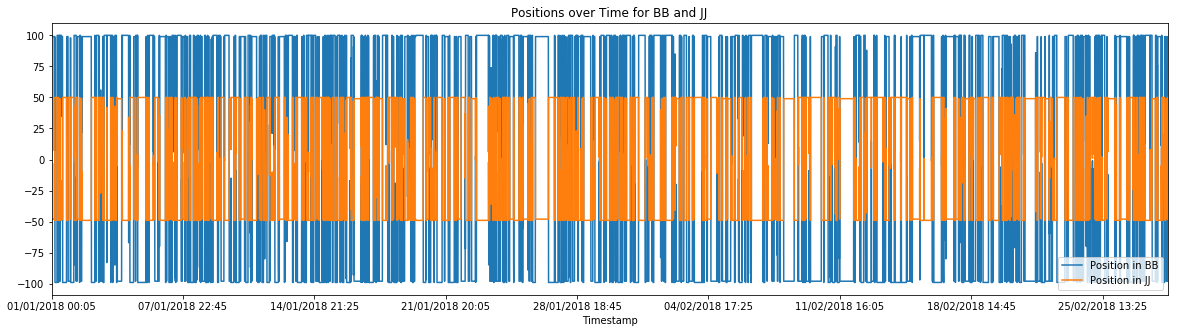

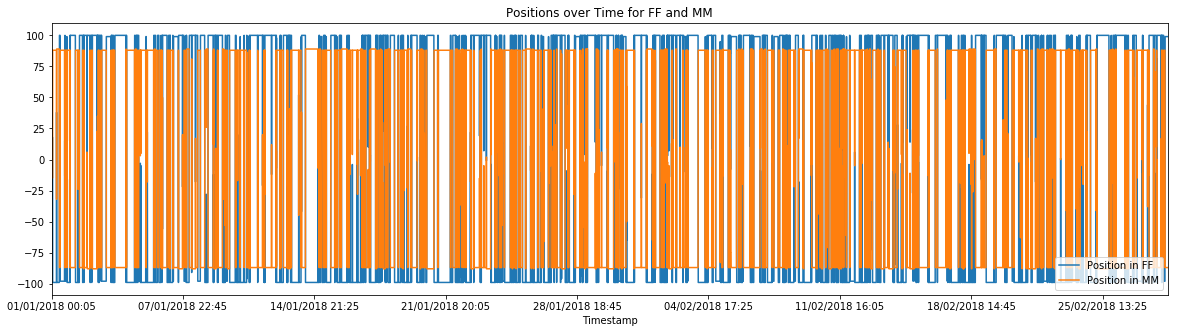

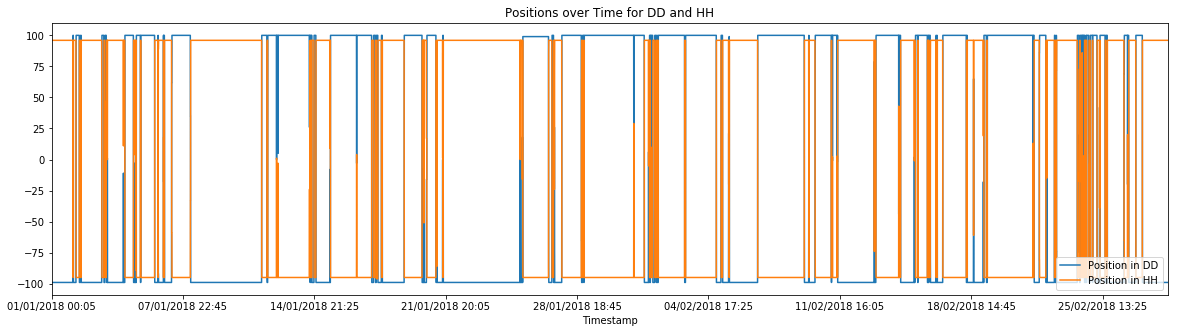

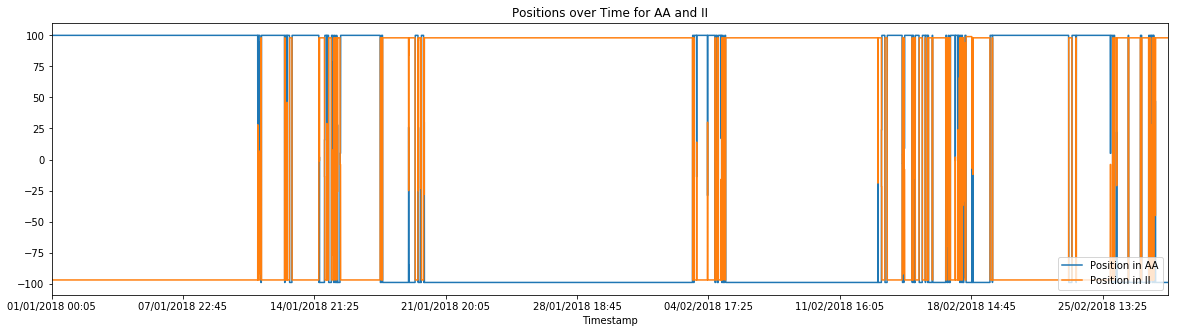

In [38]:
# Show Positions over Time
for pairs in stock_pairs_final:
    stock1 = pairs[0]
    stock2 = pairs[1]
    
    plt.figure(figsize=(20,5))
    
    positions_strategy_1[stock1].plot()
    positions_strategy_1[stock2].plot()
    
    plt.title('Positions over Time for ' + stock1 + ' and ' + stock2)
    plt.legend(["Position in " + stock1,"Position in " + stock2], loc='lower right')
    
    plt.show()

This code loops through a collection of pairs of stocks, and for each pair, it retrieves the first and second item. It also creates a figure with the size of 20 by 5. Then, it plots the positions of the first and second stock in the pair over time. After that, it adds a title to the figure with the names of the two stocks, and it adds a legend indicating which line represents which stock. Finally, it shows the figure. This process is repeated for each pair of stocks in the collection.

Re-run the PnL forloop to determine the profits. This could also be manually calculated with pnl_threshold values.

In [39]:
pnl_dataframe_strategy_1 = pd.DataFrame()

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]
    
    Stock1_AskPrice = tradable_pairs_data[stock1,'AskPrice'][1:]
    Stock1_BidPrice = tradable_pairs_data[stock1,'BidPrice'][1:]
    Stock2_AskPrice = tradable_pairs_data[stock2,'AskPrice'][1:]
    Stock2_BidPrice = tradable_pairs_data[stock2,'BidPrice'][1:]

    pnl_dataframe_strategy_1[stock1] = np.where(positions_diff_strategy_1[stock1] > 0, positions_diff_strategy_1[stock1] * -Stock1_BidPrice, positions_diff_strategy_1[stock1] * -Stock1_AskPrice)
    pnl_dataframe_strategy_1[stock2] = np.where(positions_diff_strategy_1[stock2] > 0, positions_diff_strategy_1[stock2] * -Stock2_BidPrice, positions_diff_strategy_1[stock2] * -Stock2_AskPrice)

print("The total profit is: €",round(pnl_dataframe_strategy_1.sum().sum()))

The total profit is: € 135848.0


This python code creates a dataframe called pnl_dataframe_strategy_1 and populates it with profit data for different stock pairs. It does this by looping through a list of stock pairs and retrieving ask and bid prices for each stock from a larger dataset. It then uses these prices and other data to calculate the profit for each stock and add it to the dataframe. The final line prints out the total profit for all the stock pairs in euros.

In [40]:
pnl_dataframe_strategy_1['Timestamp'] = tradable_pairs_data.index[1:]
pnl_dataframe_strategy_1 = pnl_dataframe_strategy_1.set_index('Timestamp')

pnl_dataframe_strategy_1['PnL'] = pnl_dataframe_strategy_1.sum(axis=1)
pnl_dataframe_strategy_1['Cum PnL'] = pnl_dataframe_strategy_1['PnL'].cumsum()

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]

    pnl_dataframe_strategy_1[stock1+stock2 + ' PnL'] = pnl_dataframe_strategy_1[stock1] + pnl_dataframe_strategy_1[stock2]
    pnl_dataframe_strategy_1[stock1+stock2 + ' Cum PnL'] = pnl_dataframe_strategy_1[stock1+stock2 + ' PnL'].cumsum()

pnl_dataframe_strategy_1.tail()

BB       JJ       FF       MM       DD       HH  \
Timestamp                                                                 
28/02/2018 23:35  -7181.25  2861.95     -0.0    -0.00     -0.0     -0.0   
28/02/2018 23:40  14880.00 -5932.85     -0.0    -0.00     -0.0     -0.0   
28/02/2018 23:45   4032.00 -1615.95     -0.0    -0.00     -0.0     -0.0   
28/02/2018 23:50     -0.00    -0.00     -0.0    -0.00     -0.0     -0.0   
28/02/2018 23:55  -9383.50  3862.50  10474.2 -7851.75 -11127.6  14371.2   

                      AA      II      PnL    Cum PnL  BBJJ PnL  BBJJ Cum PnL  \
Timestamp                                                                      
28/02/2018 23:35    -0.0    -0.0 -4319.30  124462.35  -4319.30      40830.20   
28/02/2018 23:40    -0.0    -0.0  8947.15  133409.50   8947.15      49777.35   
28/02/2018 23:45    -0.0    -0.0  2416.05  135825.55   2416.05      52193.40   
28/02/2018 23:50    -0.0    -0.0     0.00  135825.55     -0.00      52193.40   
28/02/2018 23:55 -9187.2  8864.1    21.95  135847.50  -5521.00      46672.40   

                  FFMM PnL  FFMM Cum PnL  DDHH PnL  DDHH Cum PnL  AAII PnL  \
Timestamp                                                                    
28/02/2018 23:35     -0.00      56565.05      -0.0       16309.3      -0.0   
28/02/2018 23:40     -0.00      56565.05      -0.0       16309.3      -0.0   
28/02/2018 23:45     -0.00      56565.05      -0.0       16309.3      -0.0   
28/02/2018 23:50     -0.00      56565.05      -0.0       16309.3      -0.0   
28/02/2018 23:55   2622.45      59187.50    3243.6       19552.9    -323.1   

                  AAII Cum PnL  
Timestamp                       
28/02/2018 23:35       10757.8  
28/02/2018 23:40       10757.8  
28/02/2018 23:45       10757.8  
28/02/2018 23:50       10757.8  
28/02/2018 23:55       10434.7

This python code is creating a PnL (profit and loss) dataframe for a trading strategy that involves trading pairs of stocks. It first extracts the timestamp from the tradable pairs data and sets it as the index for the PnL dataframe. Then, it calculates the total PnL for the strategy by summing the PnL of each individual pair. It also calculates the cumulative PnL for the strategy. Next, it iterates through the list of stock pairs and calculates the PnL for each pair by summing the PnL of each individual stock in the pair. It then calculates the cumulative PnL for each pair. Finally, it displays the last few rows of the PnL dataframe. Overall, this code is used to track the profitability of a trading strategy involving pairs of stocks.

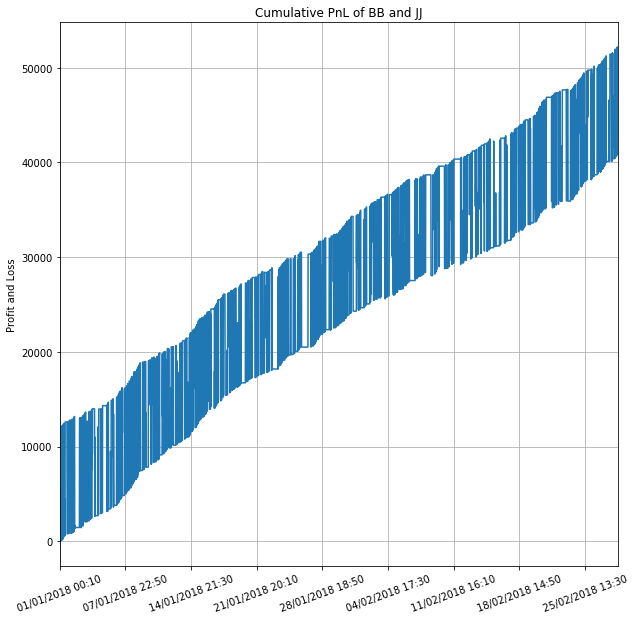

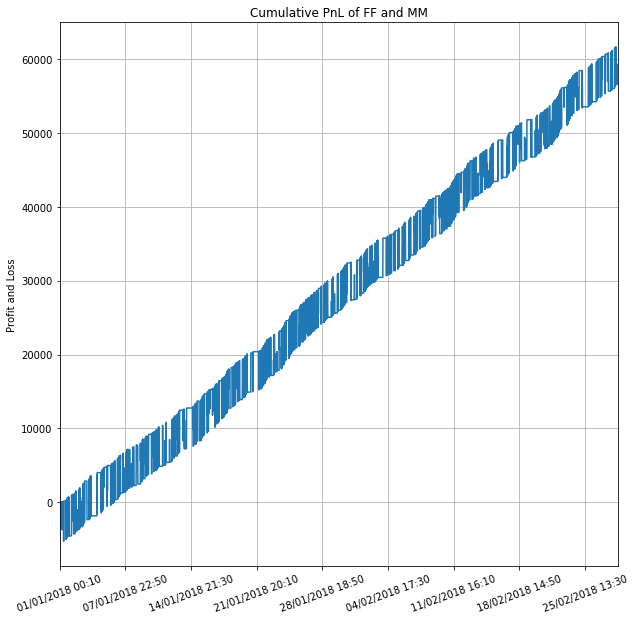

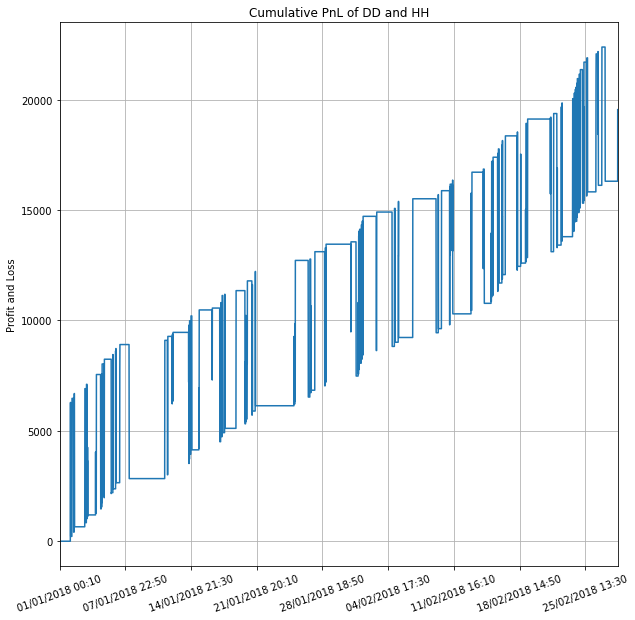

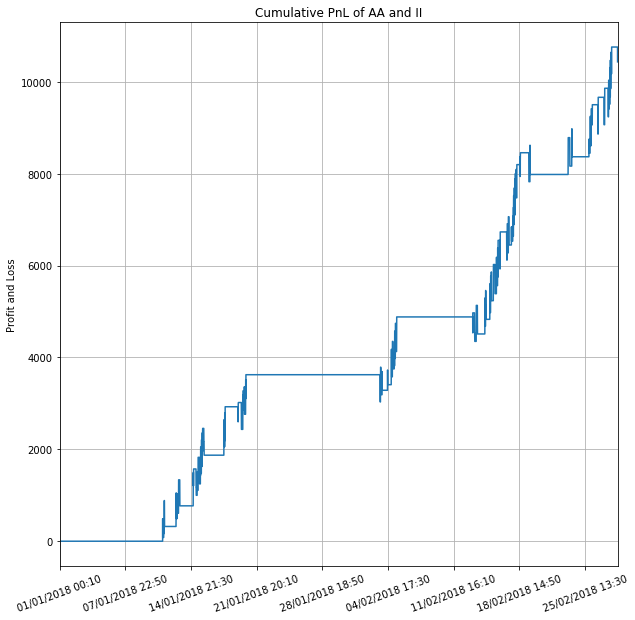

In [41]:
# All Pairs's PnL

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]
    
    pnl_dataframe_strategy_1[stock1+stock2 + ' Cum PnL'].plot(figsize=(10,10))
    plt.title('Cumulative PnL of ' + stock1 + ' and ' + stock2)
    plt.ylabel('Profit and Loss')
    plt.xlabel("")
    plt.grid()
    plt.xticks(rotation=20)
    plt.show()


This code is plotting a cumulative profit and loss graph of stock pairs, with the x-axis representing the time frame, and the y-axis representing the profit and loss values. It is looping through a list of stock pair combinations and assigning the first stock to the variable stock1 and the second stock to the variable stock2. It then uses these variables to generate the graph title and x-axis label. The grid is added for better visual representation and the x-axis labels are rotated to make them easier to read. Finally, the graph is shown. This code could be used in a financial or investment setting to visualize the cumulative profit and loss of various stock combinations.

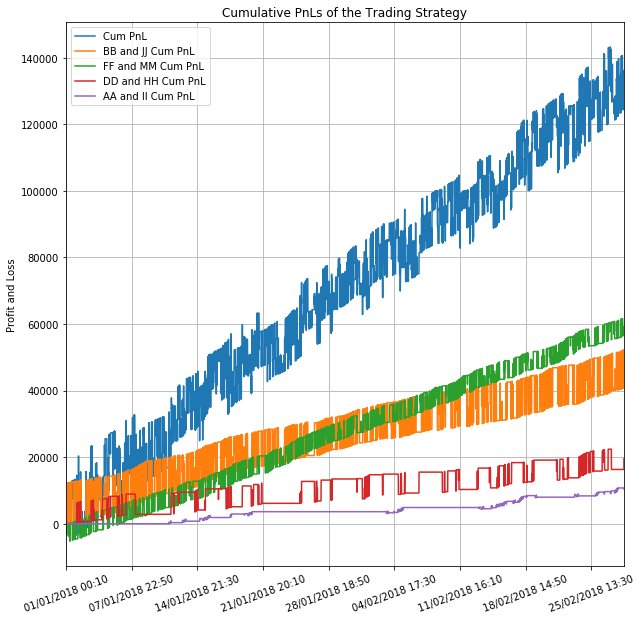

In [42]:
# All Pairs's PnLs (including total) in one graph

pnl_dataframe_strategy_1['Cum PnL'].plot()

for pair in stock_pairs_final:
    stock1 = pair[0]
    stock2 = pair[1]
    
    pnl_dataframe_strategy_1[stock1+stock2 + ' Cum PnL'].plot(figsize=(10,10))
    plt.legend(['Cum PnL', 'BB and JJ Cum PnL', 'FF and MM Cum PnL', 'DD and HH Cum PnL','AA and II Cum PnL'])
    plt.title('Cumulative PnLs of the Trading Strategy')
    plt.ylabel('Profit and Loss')
    plt.xlabel("")
    plt.grid()
    plt.xticks(rotation=20)

This python code is plotting the cumulative PnL (profit and loss) of a trading strategy. It begins by importing a library for plotting graphs, and then uses a for loop to iterate through a list of stock pairs. Within the loop, it assigns the first and second stocks in each pair to variables named stock1 and stock2. It then uses these variables to plot the cumulative PnL for each stock pair in a graph. The graph is given a title and labels for the axes, and a grid is added for better visualization. The x-axis labels are rotated for better readability.

In [43]:
# Send to CSV
pnl_dataframe_strategy_1.to_csv('Algorithm PnL Results.csv')

This code takes data from a python dataframe that represents a trading strategy and converts it into a CSV (comma separated values) file, which can then be easily shared and analyzed using other tools. The 'pnL' in the filename stands for profit and loss, indicating that the data likely includes information on the gains and losses of the trading strategy. The 'to_csv' function is a built-in python method that takes the dataframe and saves it as a CSV file with the specified filename. By saving the data as a CSV file, it can be easily imported into other programs for further analysis or visualizations.

In [44]:
# Send to Excel (in case CSV is incorrect)
pnl_dataframe_strategy_1.to_excel('Algorithm PnL Results.xlsx')

This code takes the results of a strategy for financial data, specifically a profit and loss (PnL) dataframe, and saves it in an excel file named "Algorithm PnL Results." This allows for easier visualization and analysis of the results.

In [45]:
# # Our Theme Song for this Assignment, uncomment to run
# from IPython.display import HTML
# HTML('<iframe width="1000" height="315" src="https://www.youtube.com/embed/cOJtEvpSZhM?rel=0&amp;controls=0&amp;showinfo=0;autoplay=true" frameborder="0" allowfullscreen></iframe>')

/p/complete-guide-on-python-generators    This code is using an iterator function called a generator to create a sequence of values. A generator is used to create a series of values that can be iterated through one at a time, as opposed to creating and storing all the values at once in a list. This is useful for saving memory and improving performance when dealing with large amounts of data.   The first part of the code defines a function named "my_generator" using the keyword "yield". This tells Python that this function is a generator and it will yield one value at a time when called.   The function then uses a for loop to iterate through a range of numbers, and for each number, it checks if it is divisible by 2. If it is, the number is yielded by the generator, otherwise, it is skipped.   Next, the code creates an object named "my_nums" by calling the generator function. This object can then be iterated through using a for loop to access each value, without having to store all the values in a list.   Finally, the function is called again to print the next value in the sequence, showing that a generator can be used multiple times and will continue to yield values as needed.   Overall, this code uses generators to efficiently create and iterate through a sequence of values without storing them all in memory at once.